In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/coronal_t1wce_2_class.yaml
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/55 (2).txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/40.txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/44.txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/36.txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/47.txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/19.txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/45.txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/57 (2).txt
/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/test/59.txt
/kaggle/input/brain-tumor-object-detection-datasets/co

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import shutil
import random
!pip install ultralytics
import ultralytics
from ultralytics import YOLO
import wandb
wandb.init(mode="disabled")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 19.9 MB/s eta 0:00:0000:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import os
import shutil

# Function to create and copy dataset for sagittal or coronal planes
def create_and_copy_dataset(plane_name):
    if os.path.exists(f'dataset_{plane_name}'):
        shutil.rmtree(f'dataset_{plane_name}')
    shutil.copytree(f'/kaggle/input/brain-tumor-object-detection-datasets/{plane_name}_t1wce_2_class', f'dataset_{plane_name}')

# Create and copy datasets for sagittal and coronal
create_and_copy_dataset('sagittal')
create_and_copy_dataset('coronal')


print("Datasets for sagittal and coronal created and copied.")


Datasets for sagittal and coronal created and copied.


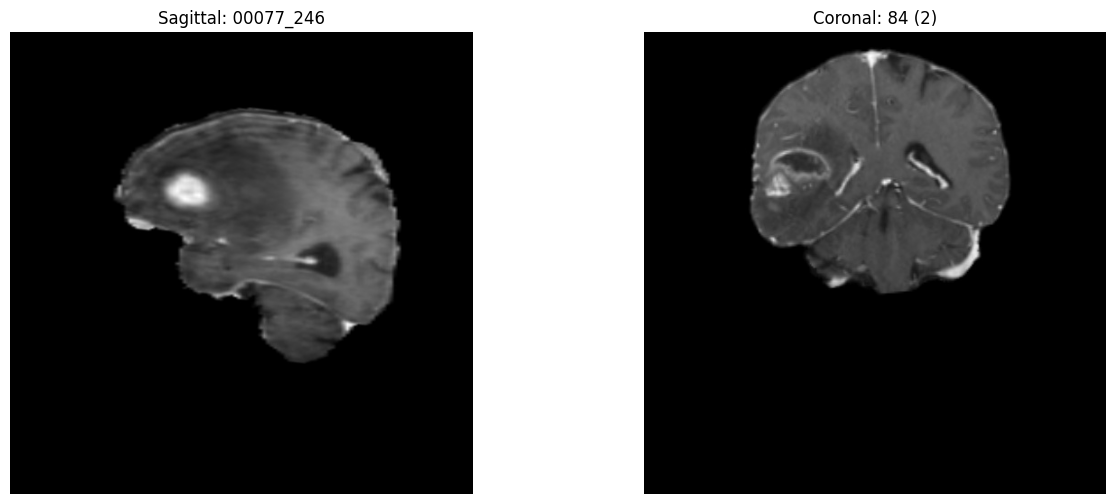

In [6]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths for sagittal and coronal image directories
sagittal_image_dir = 'dataset_sagittal/images/train'
coronal_image_dir = 'dataset_coronal/images/train'

# Get all files in both sagittal and coronal directories
sagittal_files = os.listdir(sagittal_image_dir)
coronal_files = os.listdir(coronal_image_dir)

# Randomly select a file from each directory
random_sagittal_file = random.choice(sagittal_files)
random_coronal_file = random.choice(coronal_files)

# Remove the file extension
random_sagittal_file_base = os.path.splitext(random_sagittal_file)[0]
random_coronal_file_base = os.path.splitext(random_coronal_file)[0]

# Full paths to the images
sagittal_image_path = os.path.join(sagittal_image_dir, random_sagittal_file)
coronal_image_path = os.path.join(coronal_image_dir, random_coronal_file)

# Read and display sagittal image
sagittal_image = cv2.imread(sagittal_image_path)
sagittal_image_rgb = cv2.cvtColor(sagittal_image, cv2.COLOR_BGR2RGB)

# Read and display coronal image
coronal_image = cv2.imread(coronal_image_path)
coronal_image_rgb = cv2.cvtColor(coronal_image, cv2.COLOR_BGR2RGB)

# Plot both images
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Display sagittal image
axs[0].imshow(sagittal_image_rgb)
axs[0].set_title(f"Sagittal: {random_sagittal_file_base}")
axs[0].axis('off')

# Display coronal image
axs[1].imshow(coronal_image_rgb)
axs[1].set_title(f"Coronal: {random_coronal_file_base}")
axs[1].axis('off')

plt.show()


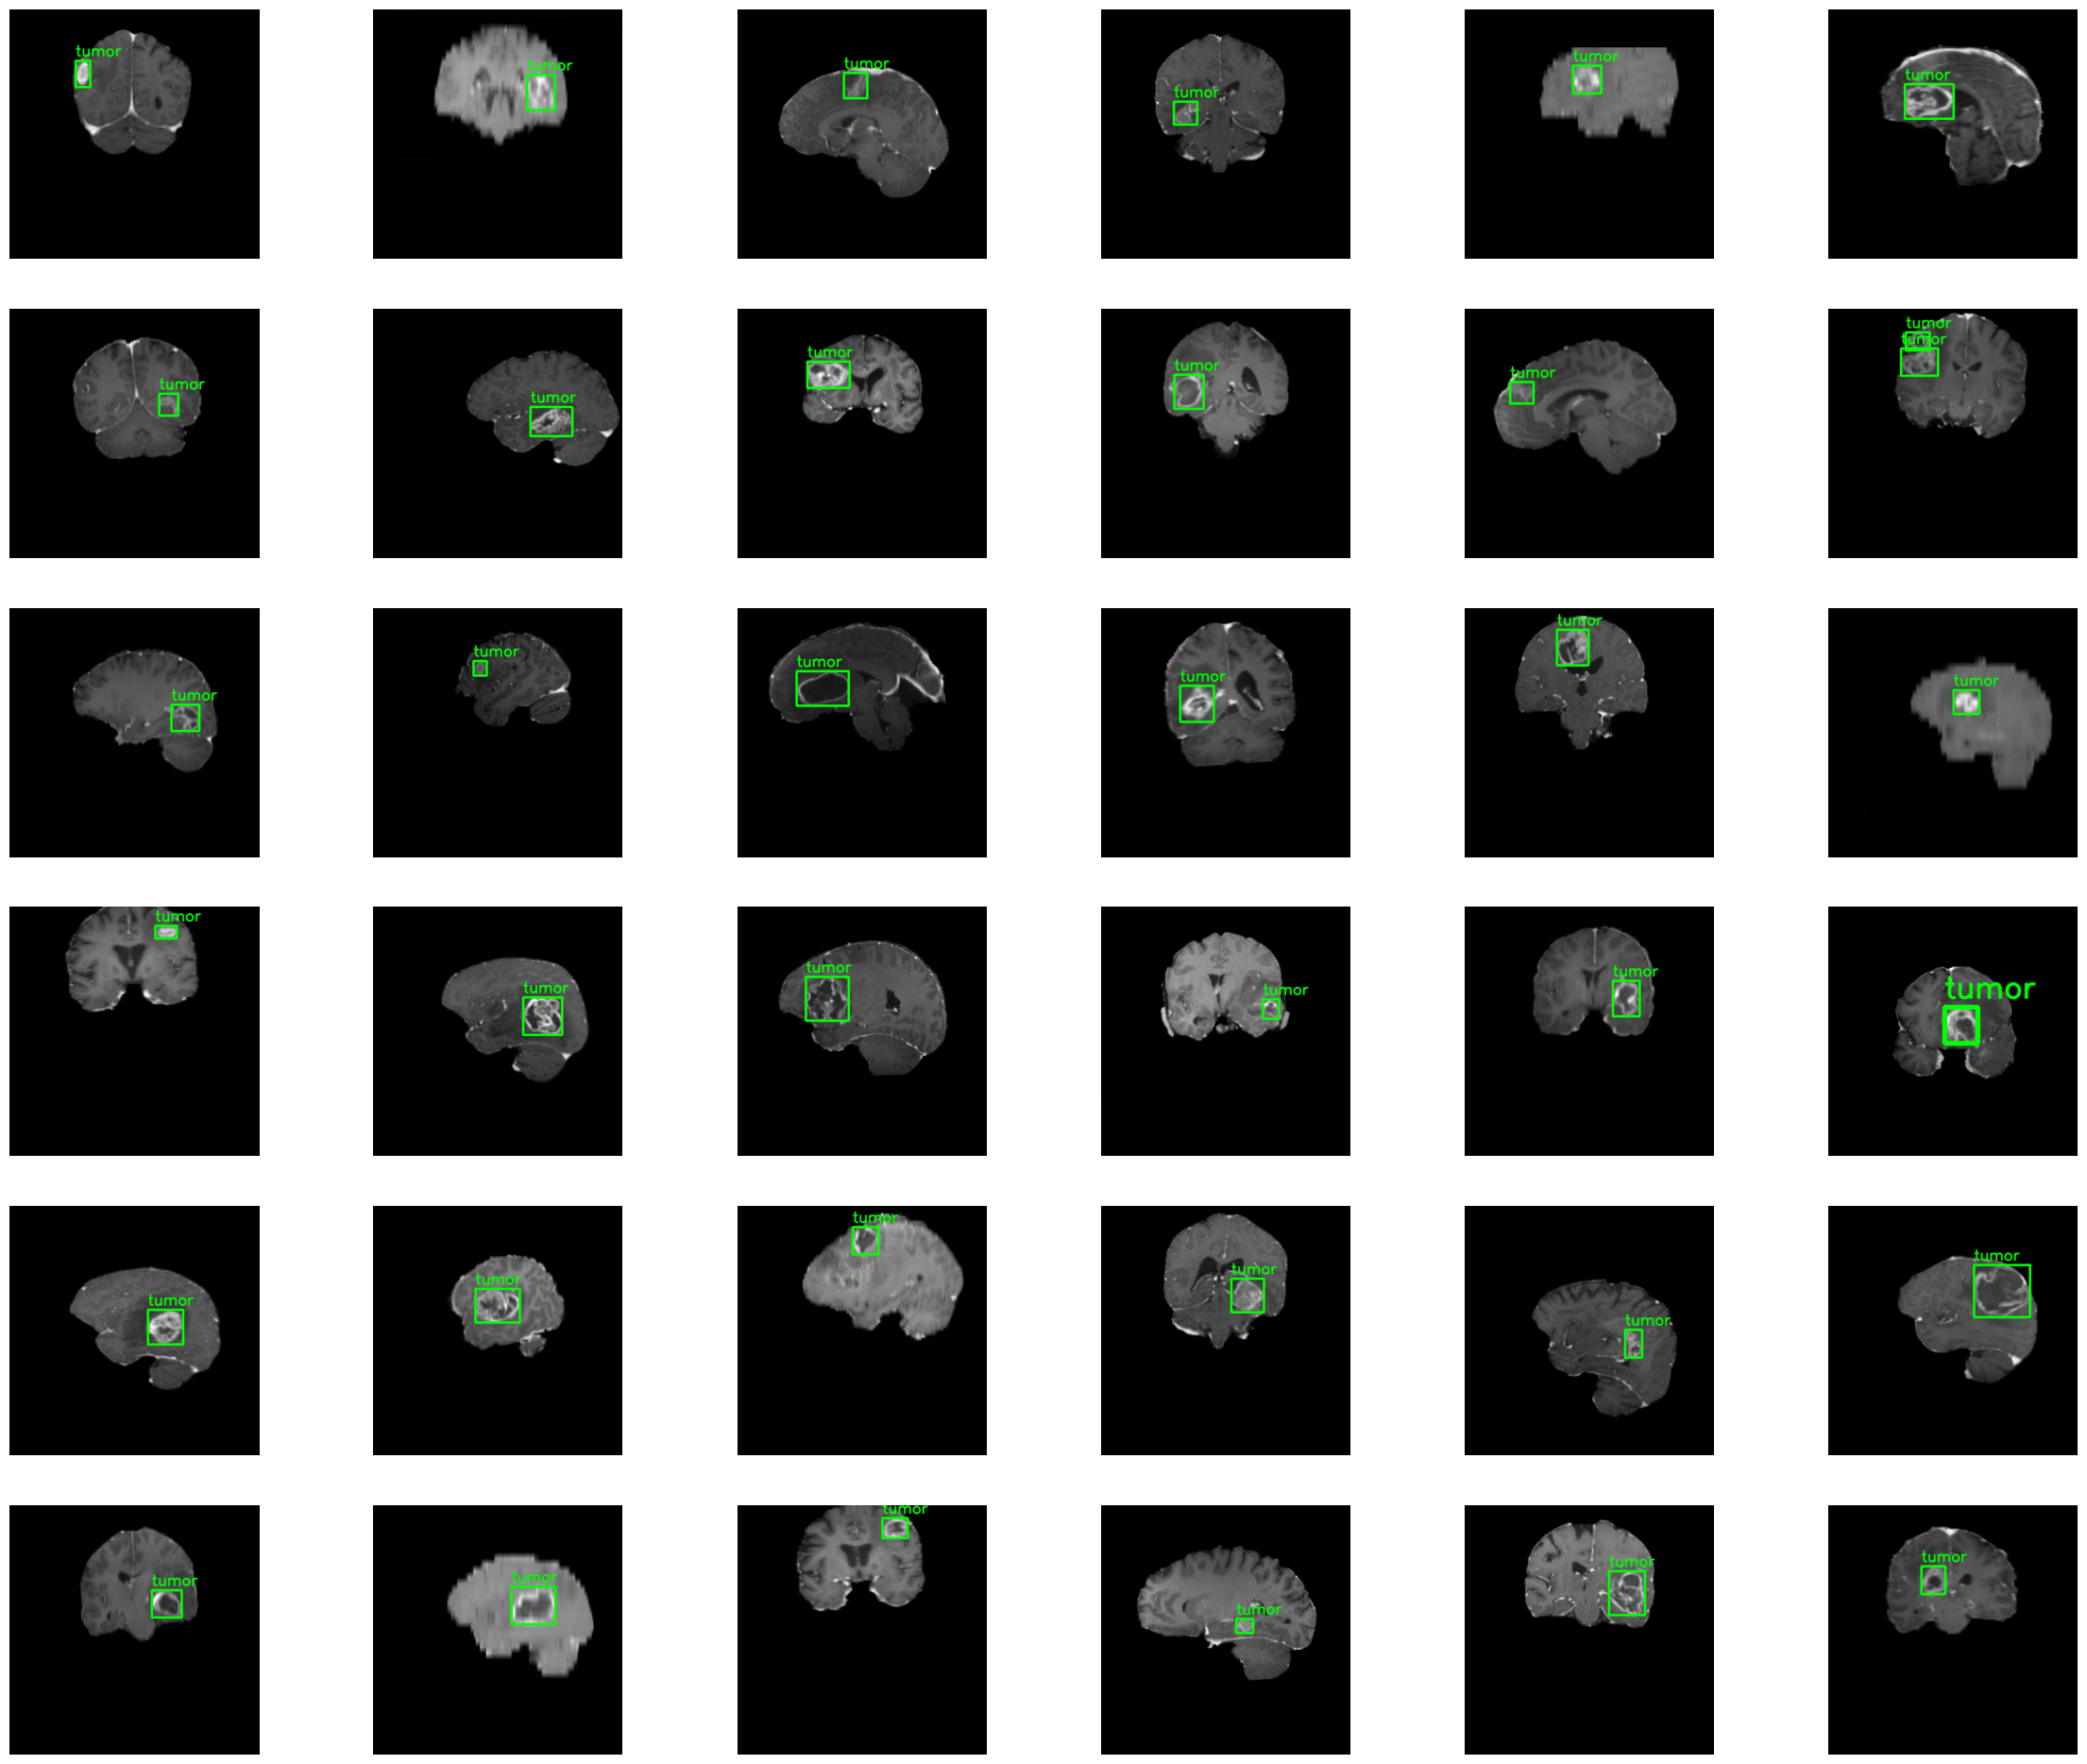

In [7]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Paths for sagittal and coronal image directories and labels
sagittal_image_dir = '/kaggle/working/dataset_sagittal/images/train'
coronal_image_dir = '/kaggle/working/dataset_coronal/images/train'

sagittal_label_dir = '/kaggle/working/dataset_sagittal/labels/train'
coronal_label_dir = '/kaggle/working/dataset_coronal/labels/train'

# Combine files from both sagittal and coronal datasets
sagittal_files = os.listdir(sagittal_image_dir)
coronal_files = os.listdir(coronal_image_dir)

# Select random samples from both
random_sagittal_images = random.sample(sagittal_files, 18)
random_coronal_images = random.sample(coronal_files, 18)

# Merge samples to create a balanced grid of 36 images (18 sagittal + 18 coronal)
random_images = random_sagittal_images + random_coronal_images
random.shuffle(random_images)

fig, axs = plt.subplots(6, 6, figsize=(29,24))

for i, image_file in enumerate(random_images):
    row = i // 6
    col = i % 6
    
    # Determine if the image is sagittal or coronal
    if image_file in random_sagittal_images:
        image_path = os.path.join(sagittal_image_dir, image_file)
        label_path = os.path.join(sagittal_label_dir, os.path.splitext(image_file)[0] + ".txt")
    else:
        image_path = os.path.join(coronal_image_dir, image_file)
        label_path = os.path.join(coronal_label_dir, os.path.splitext(image_file)[0] + ".txt")
    
    image = cv2.imread(image_path)

    if not os.path.exists(label_path):
        print(f"Label file not found for {image_file}")
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        continue

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
        cv2.putText(image, "tumor", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


In [8]:
import os

# Paths for sagittal and coronal datasets
sagittal_image_dir = 'dataset_sagittal/images/train'
coronal_image_dir = 'dataset_coronal/images/train'

sagittal_label_dir = 'dataset_sagittal/labels/train'
coronal_label_dir = 'dataset_coronal/labels/train'

# Get image and label lists for sagittal and coronal datasets
sagittal_train_images = os.listdir(sagittal_image_dir)
coronal_train_images = os.listdir(coronal_image_dir)

sagittal_train_labels = os.listdir(sagittal_label_dir)
coronal_train_labels = os.listdir(coronal_label_dir)

# Combine the lists
train_images = sagittal_train_images + coronal_train_images
train_labels = sagittal_train_labels + coronal_train_labels

# Remove duplicates (if any) by ensuring unique filenames
unique_train_images = list(set(train_images))
unique_train_labels = list(set(train_labels))

# Number of images and labels
num_train_images = len(unique_train_images)
num_train_labels = len(unique_train_labels)

# Test datasets for sagittal and coronal
test_sagittal_image_dir = 'dataset_sagittal/images/test'
test_coronal_image_dir = 'dataset_coronal/images/test'

test_sagittal_labels_dir = 'dataset_sagittal/labels/test'
test_coronal_labels_dir = 'dataset_coronal/labels/test'

test_images = os.listdir(test_sagittal_image_dir) + os.listdir(test_coronal_image_dir)
test_labels = os.listdir(test_sagittal_labels_dir) + os.listdir(test_coronal_labels_dir)

# Remove duplicates for test datasets
unique_test_images = list(set(test_images))
unique_test_labels = list(set(test_labels))

num_test_images = len(unique_test_images)
num_test_labels = len(unique_test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)


583 148
582 148


In [9]:
import os

# Paths for sagittal and coronal datasets
sagittal_image_dir = 'dataset_sagittal/images/train'
coronal_image_dir = 'dataset_coronal/images/train'

sagittal_label_dir = 'dataset_sagittal/labels/train'
coronal_label_dir = 'dataset_coronal/labels/train'

# Get train images and labels for both sagittal and coronal
sagittal_train_images = os.listdir(sagittal_image_dir)
coronal_train_images = os.listdir(coronal_image_dir)

sagittal_train_labels = os.listdir(sagittal_label_dir)
coronal_train_labels = os.listdir(coronal_label_dir)

# Combine labels for unlabelled image removal
all_train_labels = sagittal_train_labels + coronal_train_labels

# Remove duplicates from labels
unique_train_labels = list(set([os.path.splitext(label)[0] + '.jpg' for label in all_train_labels]))

# Remove unlabelled images from sagittal and coronal datasets
sagittal_unlabelled = set(sagittal_train_images) - set(unique_train_labels)
coronal_unlabelled = set(coronal_train_images) - set(unique_train_labels)

# Remove unlabelled images from directories
for image in sagittal_unlabelled:
    os.remove(os.path.join(sagittal_image_dir, image))

for image in coronal_unlabelled:
    os.remove(os.path.join(coronal_image_dir, image))

print(f"Removed {len(sagittal_unlabelled)} unlabelled sagittal images.")
print(f"Removed {len(coronal_unlabelled)} unlabelled coronal images.")


Removed 0 unlabelled sagittal images.
Removed 1 unlabelled coronal images.


In [10]:
import os

# Paths for sagittal and coronal datasets
sagittal_image_dir = 'dataset_sagittal/images/train'
coronal_image_dir = 'dataset_coronal/images/train'

sagittal_label_dir = 'dataset_sagittal/labels/train'
coronal_label_dir = 'dataset_coronal/labels/train'

# Get image and label lists for sagittal and coronal datasets
sagittal_train_images = os.listdir(sagittal_image_dir)
coronal_train_images = os.listdir(coronal_image_dir)

sagittal_train_labels = os.listdir(sagittal_label_dir)
coronal_train_labels = os.listdir(coronal_label_dir)

# Combine the lists
train_images = sagittal_train_images + coronal_train_images
train_labels = sagittal_train_labels + coronal_train_labels

# Remove duplicates (if any) by ensuring unique filenames
unique_train_images = list(set(train_images))
unique_train_labels = list(set(train_labels))

# Number of images and labels
num_train_images = len(unique_train_images)
num_train_labels = len(unique_train_labels)

# Test datasets for sagittal and coronal
test_sagittal_image_dir = 'dataset_sagittal/images/test'
test_coronal_image_dir = 'dataset_coronal/images/test'

test_sagittal_labels_dir = 'dataset_sagittal/labels/test'
test_coronal_labels_dir = 'dataset_coronal/labels/test'

test_images = os.listdir(test_sagittal_image_dir) + os.listdir(test_coronal_image_dir)
test_labels = os.listdir(test_sagittal_labels_dir) + os.listdir(test_coronal_labels_dir)

# Remove duplicates for test datasets
unique_test_images = list(set(test_images))
unique_test_labels = list(set(test_labels))

num_test_images = len(unique_test_images)
num_test_labels = len(unique_test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)


582 148
582 148


In [11]:
import os
import random
import shutil

# Paths for sagittal and coronal datasets
sagittal_image_dir = 'dataset_sagittal/images/train'
coronal_image_dir = 'dataset_coronal/images/train'

sagittal_label_dir = 'dataset_sagittal/labels/train'
coronal_label_dir = 'dataset_coronal/labels/train'

# Get train images and labels for both sagittal and coronal
sagittal_train_images = os.listdir(sagittal_image_dir)
coronal_train_images = os.listdir(coronal_image_dir)

# Combine images and calculate validation split
sagittal_val_split = int(len(sagittal_train_images) * 0.2)
coronal_val_split = int(len(coronal_train_images) * 0.2)

# Random sample for validation
sagittal_val_images = random.sample(sagittal_train_images, sagittal_val_split)
coronal_val_images = random.sample(coronal_train_images, coronal_val_split)

# Remove existing validation directories if they exist
if os.path.exists('dataset_sagittal/images/val'):
    shutil.rmtree('dataset_sagittal/images/val')
if os.path.exists('dataset_sagittal/labels/val'):
    shutil.rmtree('dataset_sagittal/labels/val')

if os.path.exists('dataset_coronal/images/val'):
    shutil.rmtree('dataset_coronal/images/val')
if os.path.exists('dataset_coronal/labels/val'):
    shutil.rmtree('dataset_coronal/labels/val')

# Create validation directories
os.makedirs('./dataset_sagittal/images/val')
os.makedirs('./dataset_sagittal/labels/val')

os.makedirs('./dataset_coronal/images/val')
os.makedirs('./dataset_coronal/labels/val')

# Move validation images and labels
for image in sagittal_val_images:
    shutil.move(os.path.join(sagittal_image_dir, image), 'dataset_sagittal/images/val')
    label = os.path.splitext(image)[0] + '.txt'
    shutil.move(os.path.join(sagittal_label_dir, label), 'dataset_sagittal/labels/val')

for image in coronal_val_images:
    shutil.move(os.path.join(coronal_image_dir, image), 'dataset_coronal/images/val')
    label = os.path.splitext(image)[0] + '.txt'
    shutil.move(os.path.join(coronal_label_dir, label), 'dataset_coronal/labels/val')

# Number of validation images
num_sagittal_val_images = len(os.listdir('dataset_sagittal/images/val'))
num_coronal_val_images = len(os.listdir('dataset_coronal/images/val'))

print(f"Number of sagittal validation images: {num_sagittal_val_images}")
print(f"Number of coronal validation images: {num_coronal_val_images}")


Number of sagittal validation images: 52
Number of coronal validation images: 63


In [18]:
# Combine sagittal and coronal datasets for training
yaml_content = """
# Dataset paths
path: /kaggle/working
train:
  - /kaggle/working/dataset_sagittal/images/train
  - /kaggle/working/dataset_coronal/images/train
val:
  - /kaggle/working/dataset_sagittal/images/val
  - /kaggle/working/dataset_coronal/images/val
test:
  - /kaggle/working/dataset_sagittal/images/test
  - /kaggle/working/dataset_coronal/images/test

# Classes
nc: 2
names: ['negative', 'positive']
"""

# Write YAML content to file
yaml_path = "/kaggle/working/fixed_path.yaml"
with open(yaml_path, "w") as file:
    file.write(yaml_content)

print(f"YAML file created at {yaml_path}.")


YAML file created at /kaggle/working/fixed_path.yaml.


In [13]:
model = YOLO('yolov8s.pt')


100%|██████████| 21.5M/21.5M [00:00<00:00, 267MB/s]


In [19]:
results = model.train(data='/kaggle/working/fixed_path.yaml', epochs=100, device=0)

# Print training results
print(results)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/fixed_path.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset_coronal/labels/train... 467 images, 0 backgrounds, 0 corrupt: 100%|██████████| 467/467 [00:00<00:00, 1221.00it/s]

train: New cache created: /kaggle/working/dataset_coronal/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/dataset_coronal/labels/val... 115 images, 0 backgrounds, 0 corrupt: 100%|██████████| 115/115 [00:00<00:00, 593.96it/s]


val: New cache created: /kaggle/working/dataset_coronal/labels/val.cache
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.63G      1.611      4.835      1.376          2        640: 100%|██████████| 30/30 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        115        124      0.271      0.284      0.205      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.61G      1.264      1.935      1.171          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        115        124      0.492      0.587      0.436      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.57G      1.324      1.791      1.209          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        115        124     0.0587      0.152     0.0368     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.61G      1.282      1.647      1.185          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]


                   all        115        124      0.209      0.183     0.0752      0.027

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.58G      1.301      1.544      1.211          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]


                   all        115        124        0.4      0.693      0.402      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.6G      1.223      1.457      1.166          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        115        124      0.451      0.294      0.235      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.58G      1.168      1.406       1.15          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124      0.177      0.166       0.11     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       4.6G      1.233      1.482      1.146          1        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        115        124      0.469      0.587        0.4      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.57G      1.183       1.33      1.127          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        115        124      0.457      0.694      0.487      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.61G      1.124      1.303      1.121          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        115        124      0.455      0.805      0.486      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.57G      1.121      1.238      1.116          7        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        115        124      0.397       0.83      0.485      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       4.6G      1.077      1.232      1.097          7        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        115        124      0.453      0.755      0.509      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.57G      1.044      1.219      1.082          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        115        124      0.464       0.78      0.506       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       4.6G      1.093      1.229      1.108          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124      0.438      0.801      0.472      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.58G      1.077      1.241      1.097          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124      0.461      0.875      0.537      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.6G      1.046      1.213      1.078          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        115        124      0.488      0.775      0.516      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.57G      1.052      1.237      1.089          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        115        124      0.473      0.784      0.544      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.59G       1.12      1.221      1.123          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        115        124       0.46      0.847      0.505      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.57G      1.076      1.192      1.095          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        115        124       0.45      0.795      0.482      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.59G     0.9836      1.128      1.059          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        115        124      0.431      0.906      0.473      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.58G      1.029      1.169      1.078          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        115        124      0.476      0.792      0.519      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.6G      1.047      1.172      1.101          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        115        124      0.421      0.942      0.502       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.58G      1.048      1.126      1.073          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        115        124      0.467      0.828      0.569      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       4.6G     0.9874      1.121      1.058          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        115        124      0.458      0.848       0.57      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.57G     0.9643      1.127      1.045          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        115        124       0.46       0.85      0.519      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.59G     0.9387      1.082      1.041          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        115        124      0.465      0.849      0.575        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.58G      1.028      1.108      1.055          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        115        124      0.472      0.875      0.534      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       4.6G      0.996      1.161      1.062          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        115        124      0.454      0.829       0.54      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.57G     0.9752      1.086      1.046          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        115        124      0.477      0.798      0.582      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       4.6G       0.96      1.095      1.042          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        115        124      0.464      0.876      0.522      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.57G      0.995      1.185      1.078          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124      0.464      0.871      0.564      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.65G     0.9307      1.091      1.034          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.497       0.86      0.625      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.58G     0.9167      1.051      1.024          1        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        115        124      0.451      0.837      0.555      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       4.6G      0.956      1.089      1.041          7        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        115        124      0.474      0.866      0.518      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.57G     0.9546       1.07      1.037          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all        115        124      0.488      0.836      0.577        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.59G     0.9443      1.077      1.034          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        115        124      0.483       0.85      0.553      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.58G     0.9314      1.036      1.017          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.468      0.871      0.547      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.61G     0.8805      1.042     0.9944          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        115        124      0.484      0.881      0.607      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.57G     0.9085       1.05      1.014          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        115        124      0.524      0.773      0.611       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.61G     0.8911      1.028      1.013          6        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.491      0.867      0.593      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.58G     0.9003      1.024      1.009          7        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        115        124      0.471      0.834      0.601      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       4.6G     0.8741      1.047     0.9983          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        115        124      0.473      0.829      0.567      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.58G     0.8483     0.9879     0.9787          6        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        115        124      0.509       0.85      0.652      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       4.6G     0.8524     0.9717     0.9841          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        115        124      0.463      0.864      0.611      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.59G     0.8492     0.9656     0.9957          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        115        124      0.535      0.803      0.672      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.6G     0.8948     0.9719      1.017          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        115        124      0.513      0.839      0.676      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.57G     0.8561     0.9605     0.9838          6        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        115        124      0.519      0.827      0.647       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.61G     0.8537     0.9566     0.9932          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        115        124      0.577       0.75      0.662      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.58G     0.8203     0.9149     0.9793          7        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        115        124      0.509      0.799      0.642      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.59G     0.8365     0.9123     0.9813          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        115        124      0.498      0.862       0.67      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.57G     0.8576     0.9012     0.9859          1        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.519      0.821      0.677      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       4.6G     0.8619     0.8752     0.9901          8        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        115        124      0.524      0.821       0.64      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.58G      0.882     0.9128     0.9942          6        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        115        124       0.61       0.78      0.745      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       4.6G       0.88     0.9133     0.9927          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        115        124      0.556      0.827       0.72      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.57G     0.8502      0.936     0.9993          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        115        124      0.504      0.804      0.617      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       4.6G     0.8129     0.8327     0.9711          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        115        124      0.512      0.838      0.662      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.57G     0.7995     0.8674     0.9733          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        115        124      0.603      0.685      0.643      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.65G     0.7794      0.877     0.9546          8        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        115        124      0.578      0.775      0.699      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.58G     0.7718     0.7876     0.9562          6        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        115        124      0.546      0.843      0.734      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.65G     0.7778     0.8026      0.962          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        115        124      0.655       0.72      0.723       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.58G     0.7973     0.7694     0.9742          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.597      0.805      0.691      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.61G     0.7934     0.8404     0.9813          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        115        124      0.604      0.788      0.739      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.57G     0.7957     0.7714     0.9752          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        115        124      0.582      0.795      0.743      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       4.6G     0.8043     0.7779     0.9816          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        115        124      0.601      0.756      0.683      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.57G     0.7675     0.7106     0.9474          7        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        115        124      0.557      0.807      0.685      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       4.6G     0.7618     0.6964     0.9446          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.623      0.698      0.686      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.57G     0.8029     0.8225     0.9644          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        115        124        0.6      0.795      0.699      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.65G     0.7373     0.6795     0.9374          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        115        124       0.65      0.732      0.701      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.58G     0.7521     0.7125     0.9496          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        115        124      0.599      0.752      0.712      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.59G     0.7371     0.6623     0.9411          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124       0.62      0.723      0.719      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.58G     0.7974     0.7107     0.9628          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124      0.648      0.755      0.737      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       4.6G     0.7402     0.6791     0.9334          8        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124      0.691      0.699       0.75      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.57G     0.7243     0.6394     0.9389          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        115        124      0.652      0.761      0.757      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.65G     0.7461     0.6346     0.9472          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        115        124      0.759      0.663      0.745      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.58G     0.7136      0.636      0.922          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        115        124      0.702      0.733      0.768       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       4.6G     0.7283     0.6233     0.9389          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        115        124      0.688      0.741      0.759       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.57G     0.7106     0.6137     0.9545          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        115        124      0.762      0.714      0.781      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       4.6G     0.7053     0.6142     0.9304          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        115        124      0.681      0.731      0.742      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.58G     0.7164     0.5527     0.9249          6        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        115        124      0.655      0.691      0.699      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.65G     0.7091     0.6159     0.9397          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        115        124      0.609      0.785      0.727      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.57G     0.6927     0.5734     0.9245          4        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.675      0.728        0.7      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       4.6G      0.688     0.5745     0.9337          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        115        124      0.636      0.773      0.701      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.57G     0.7145     0.5737     0.9369          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        115        124      0.727      0.768       0.78      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.61G     0.6886     0.5335     0.9263          5        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        115        124      0.693      0.721      0.723       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.57G     0.6759     0.5243     0.9276          2        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        115        124      0.654      0.761      0.712      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.59G     0.6785     0.5781     0.9231          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        115        124      0.749      0.712      0.762      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.58G     0.6485     0.5226     0.9045          1        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.684      0.724      0.749       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.6G     0.6466     0.5166     0.9021          6        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        115        124      0.704      0.677      0.735       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.59G     0.6609     0.5369     0.9109          9        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        115        124      0.729      0.684       0.77      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.61G     0.6403     0.5009     0.9129          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        115        124      0.695      0.709       0.75      0.566


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.57G     0.5986     0.4353     0.8679          3        640: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        115        124      0.676      0.821      0.772      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.6G     0.5864     0.4053     0.8711          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        115        124      0.735      0.754      0.782      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.59G     0.5789     0.3914     0.8686          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        115        124      0.756      0.764       0.79      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.61G     0.5607     0.3776     0.8726          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        115        124      0.759      0.716      0.757      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.57G     0.5543     0.3802      0.868          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        115        124      0.736      0.741      0.752      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.59G     0.5538     0.3929     0.8723          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        115        124      0.707      0.733      0.739      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.57G     0.5431     0.3821     0.8576          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        115        124      0.756      0.738      0.744      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.61G      0.558     0.3587      0.868          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        115        124      0.707      0.779      0.761      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.58G     0.5601     0.3733     0.8688          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        115        124      0.734      0.775      0.764      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       4.6G      0.534     0.3489     0.8556          3        640: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        115        124      0.787      0.707      0.757      0.566



100 epochs completed in 0.294 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


                   all        115        124      0.763      0.714      0.782      0.578
              negative         50         52       0.72      0.788      0.814       0.62
              positive         65         72      0.807      0.639      0.749      0.535
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1237be1240>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,    


0: 640x640 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 negative, 8.4ms
Speed: 2.4ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 positive, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 positive, 8.4ms
Speed: 2.4ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 negatives, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.7ms postprocess per image 

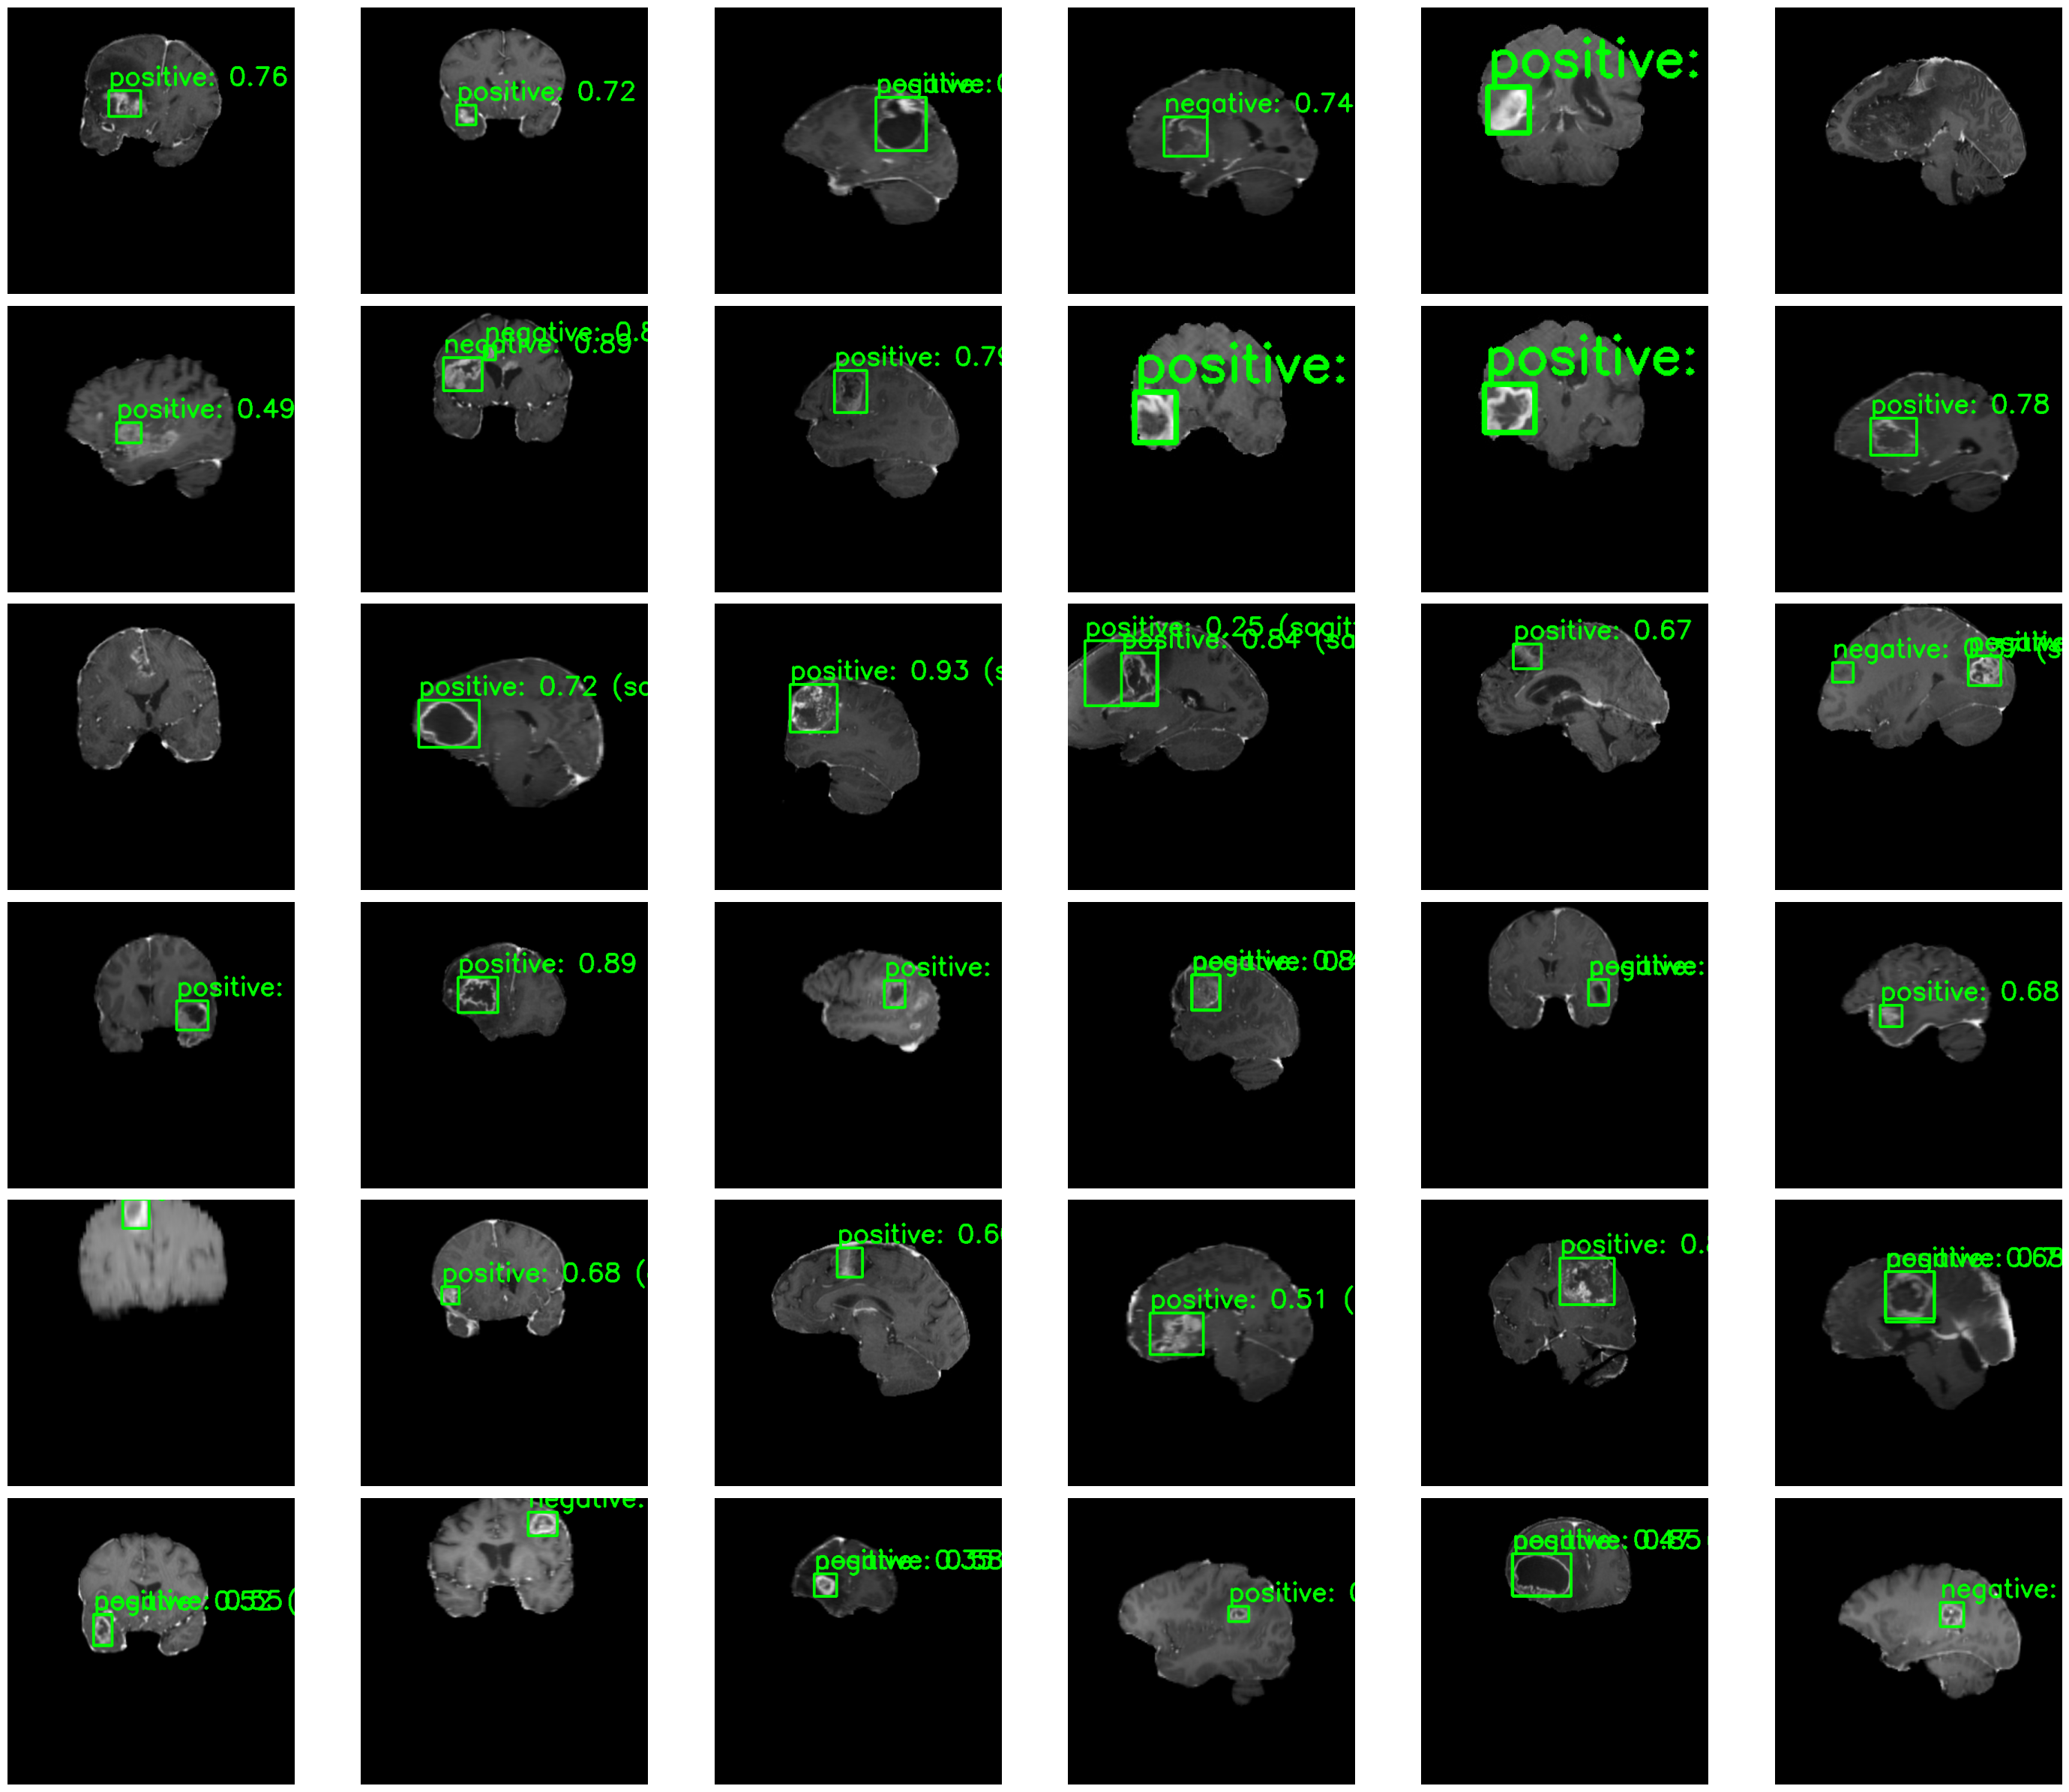

In [24]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model
model_path = '/kaggle/working/runs/detect/train4/weights/best.pt'  # Replace with the correct path to the trained model
model = YOLO(model_path)

# Define the test directories for both sagittal and coronal
test_dirs = {
    "sagittal": '/kaggle/working/dataset_sagittal/images/test',
    "coronal": '/kaggle/working/dataset_coronal/images/test',
}

# Collect test images from both directories
test_images = []
for plane, test_dir in test_dirs.items():
    if os.path.exists(test_dir):
        test_images.extend([(os.path.join(test_dir, f), plane) for f in os.listdir(test_dir)])

# Randomly select 36 test images
random_test_images = random.sample(test_images, min(36, len(test_images)))

# Create a 6x6 grid for visualization
fig, axs = plt.subplots(6, 6, figsize=(29, 24))

for i, (image_path, plane) in enumerate(random_test_images):
    row = i // 6
    col = i % 6
    
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform prediction
    results = model.predict(image_rgb)

    # Draw bounding boxes and labels
    for result in results:
        for box in result.boxes:
            x_min, y_min, x_max, y_max = box.xyxy[0].cpu().numpy()  # Bounding box coordinates
            confidence = box.conf[0].cpu().numpy()  # Confidence score
            class_id = int(box.cls[0].cpu().numpy())  # Class ID
            
            # Draw rectangle
            cv2.rectangle(image_rgb, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 3)
            label = f"{'positive' if class_id == 1 else 'negative'}: {confidence:.2f} ({plane})"
            # Add label text
            cv2.putText(image_rgb, label, (int(x_min), int(y_min) - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

    # Display the image in the grid
    axs[row, col].imshow(image_rgb)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [25]:
metrics=model.val(split='val')

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/working/dataset_coronal/labels/val.cache... 115 images, 0 backgrounds, 0 corrupt: 100%|██████████| 115/115 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]


                   all        115        124      0.763      0.714      0.781      0.581
              negative         50         52      0.719      0.788      0.813      0.626
              positive         65         72      0.807      0.639      0.749      0.536
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val


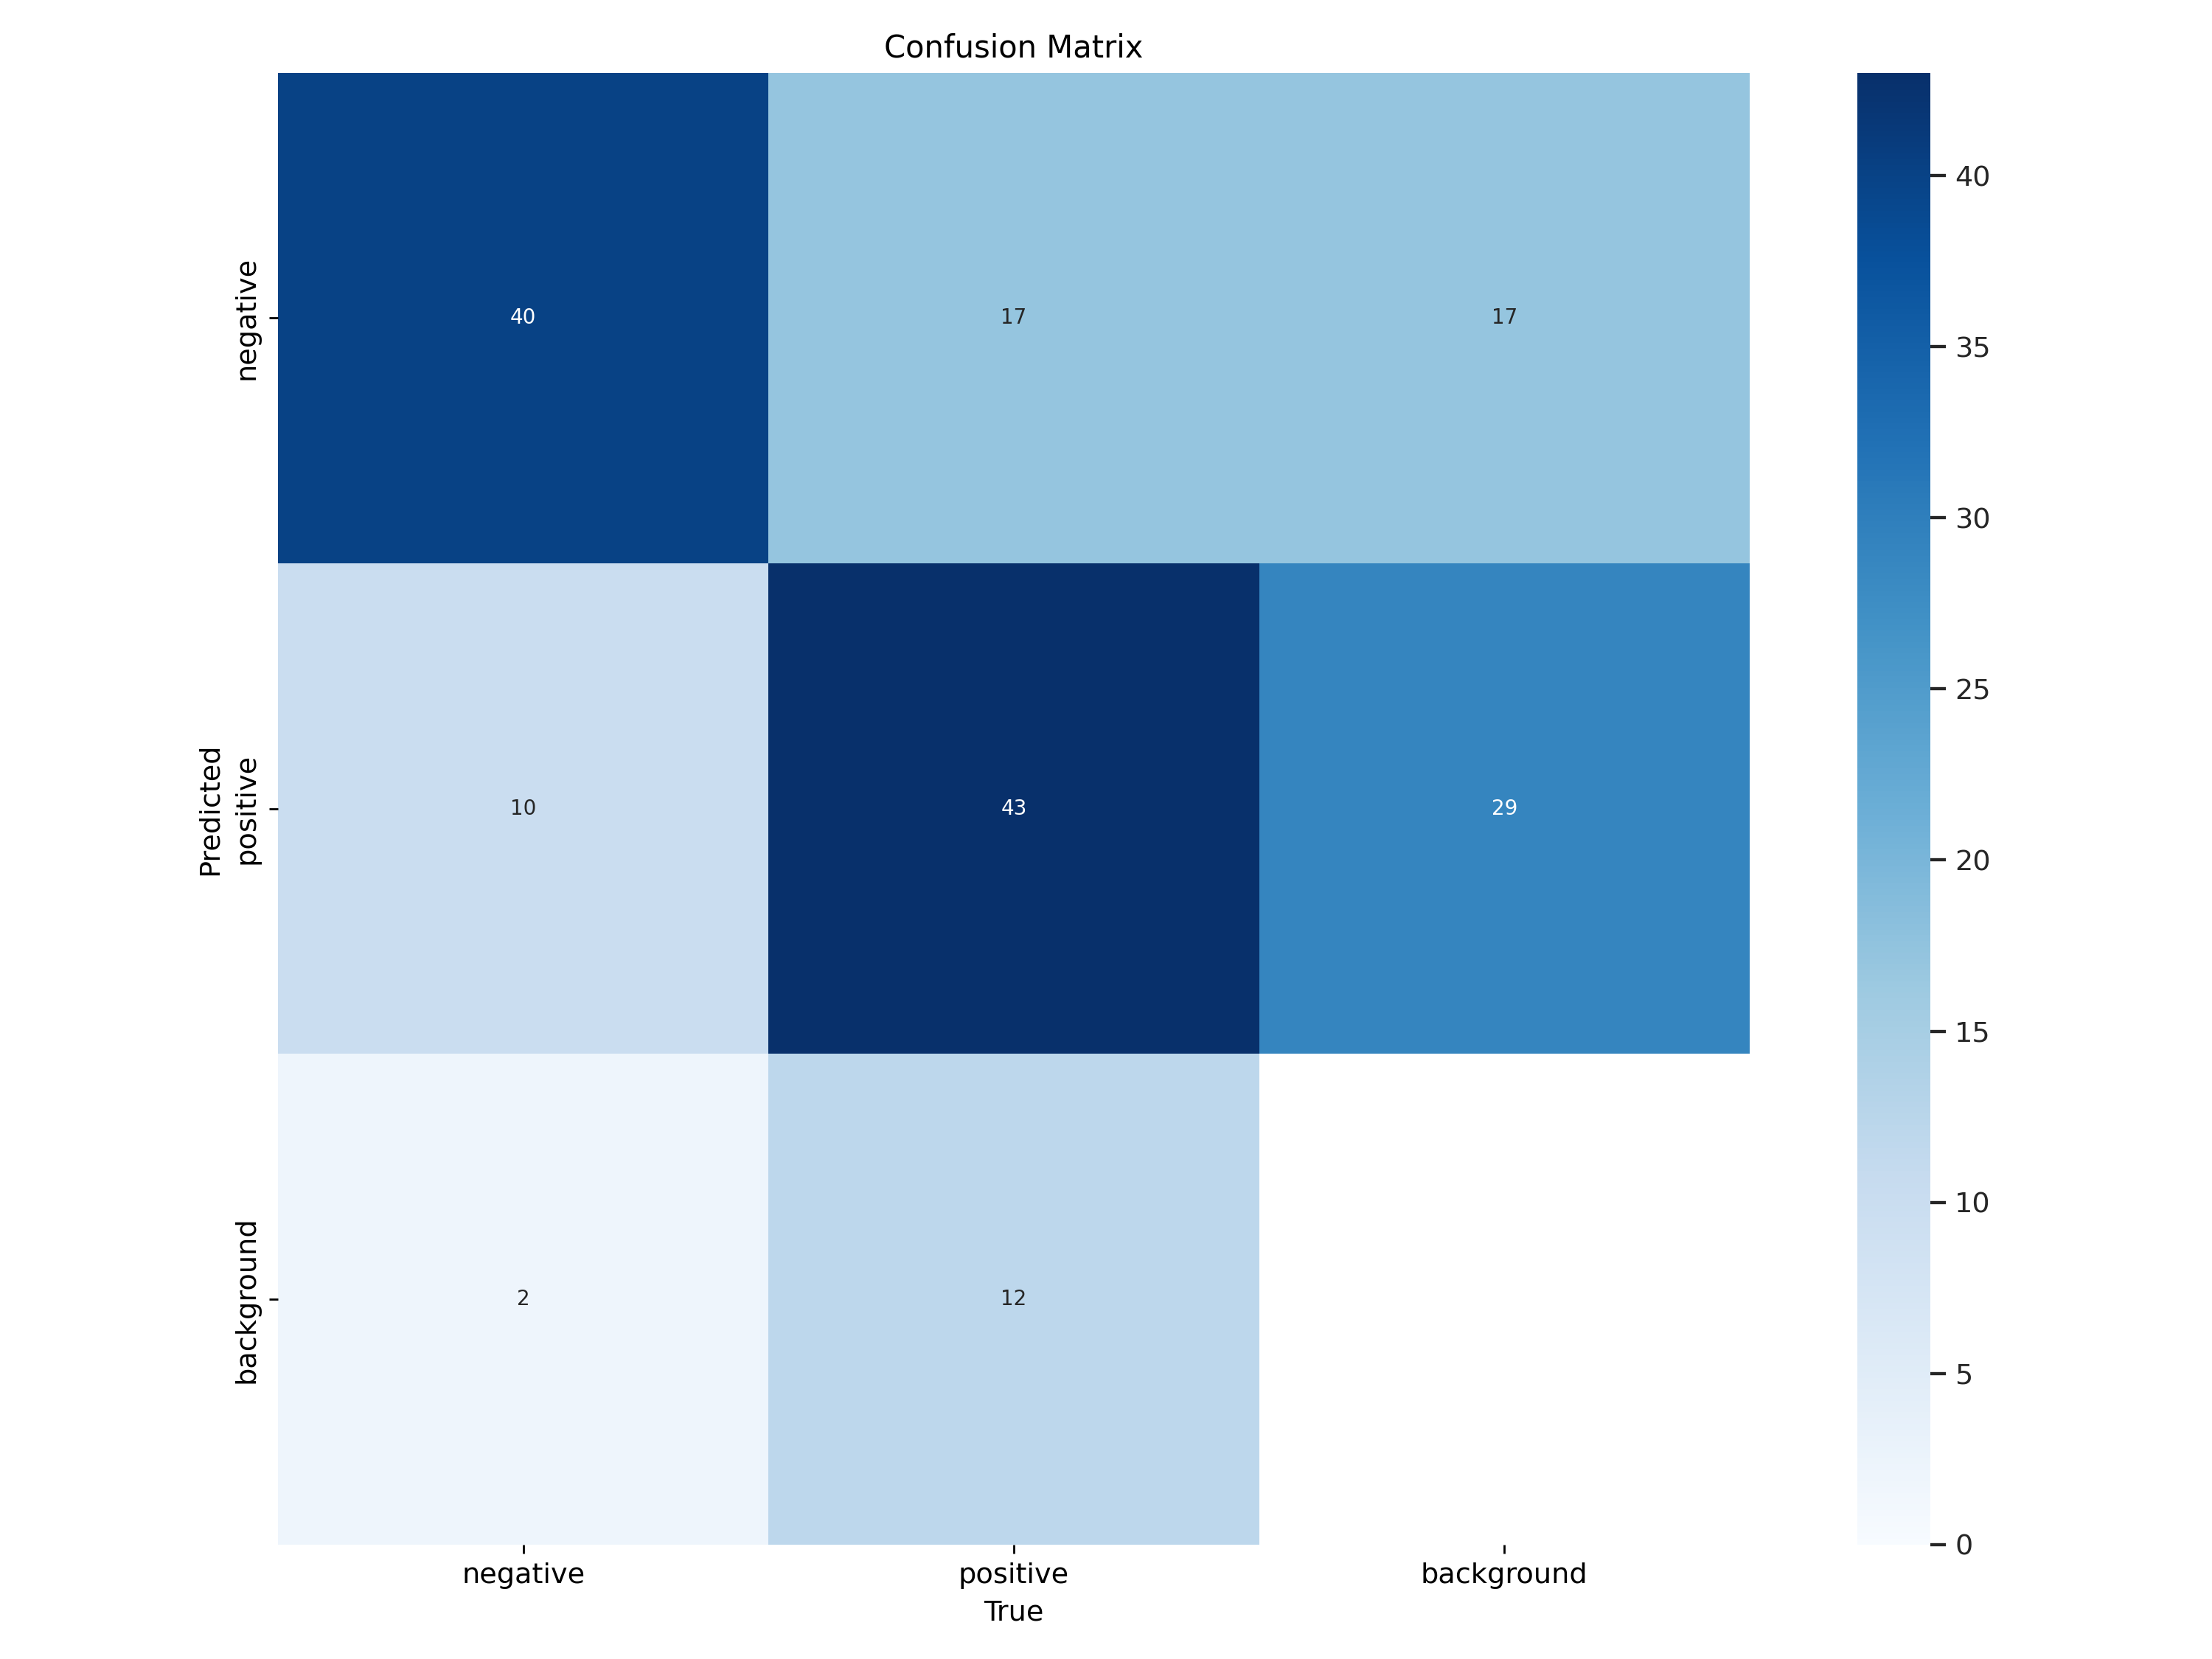

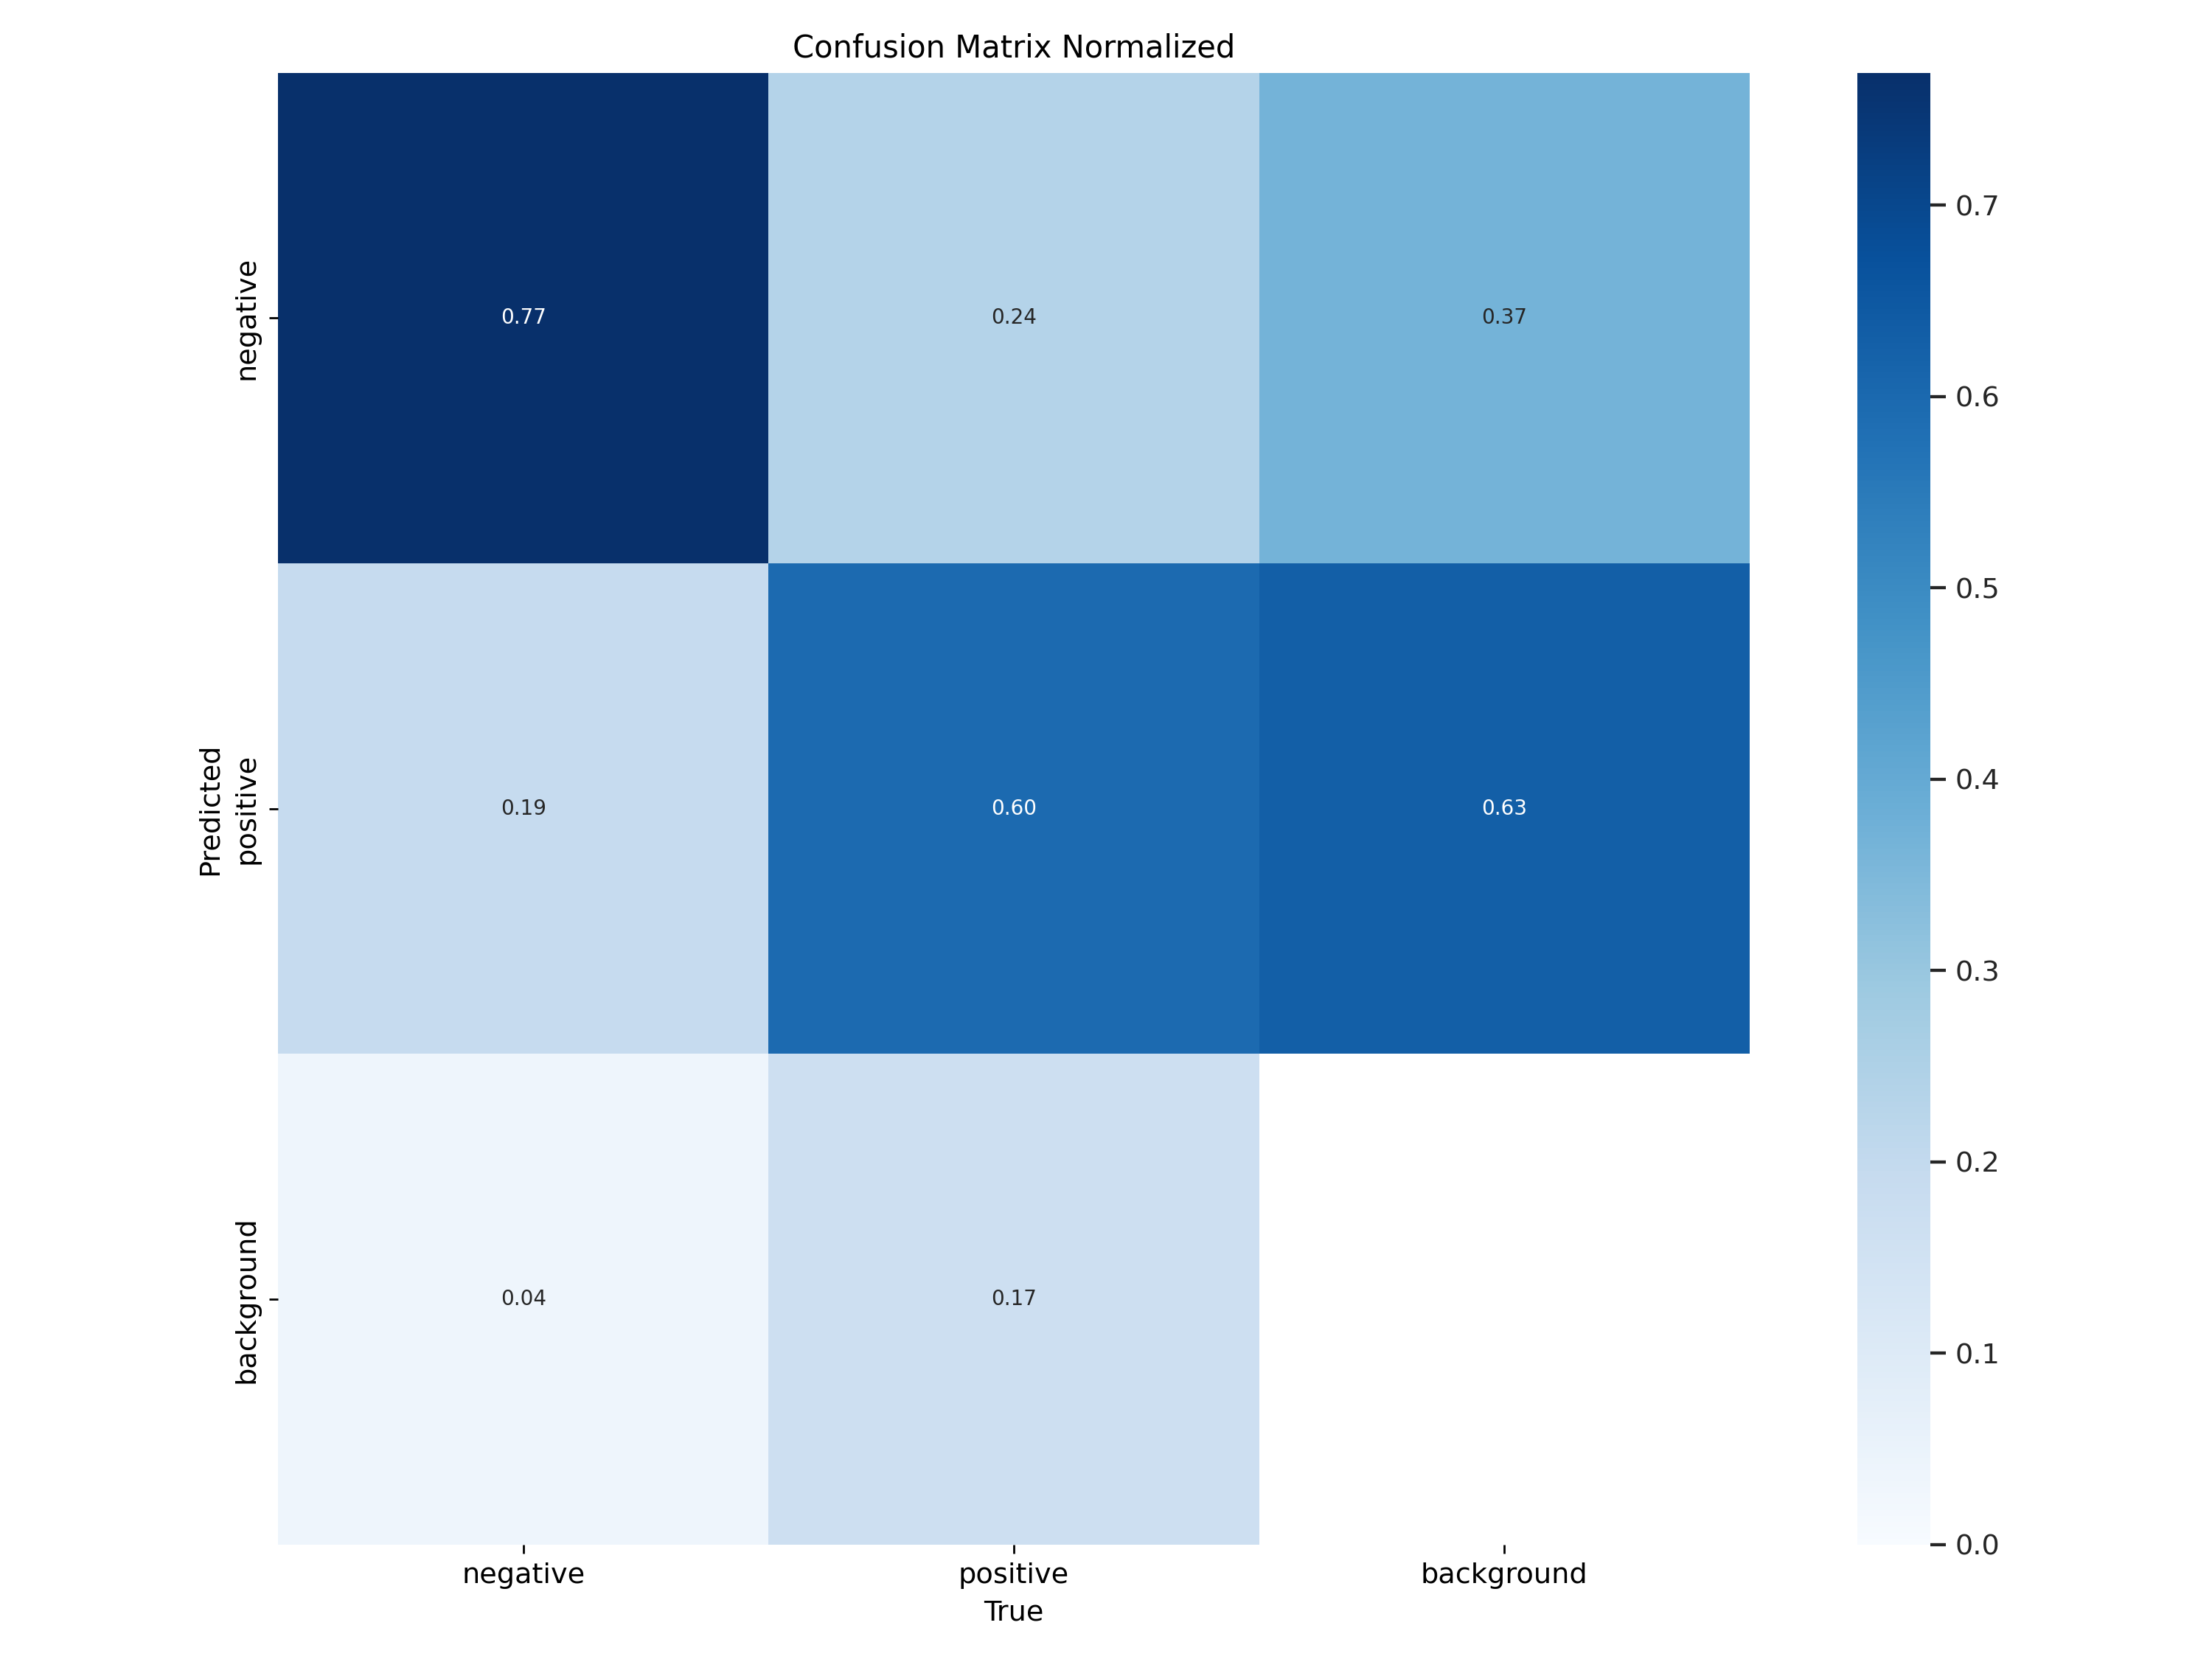

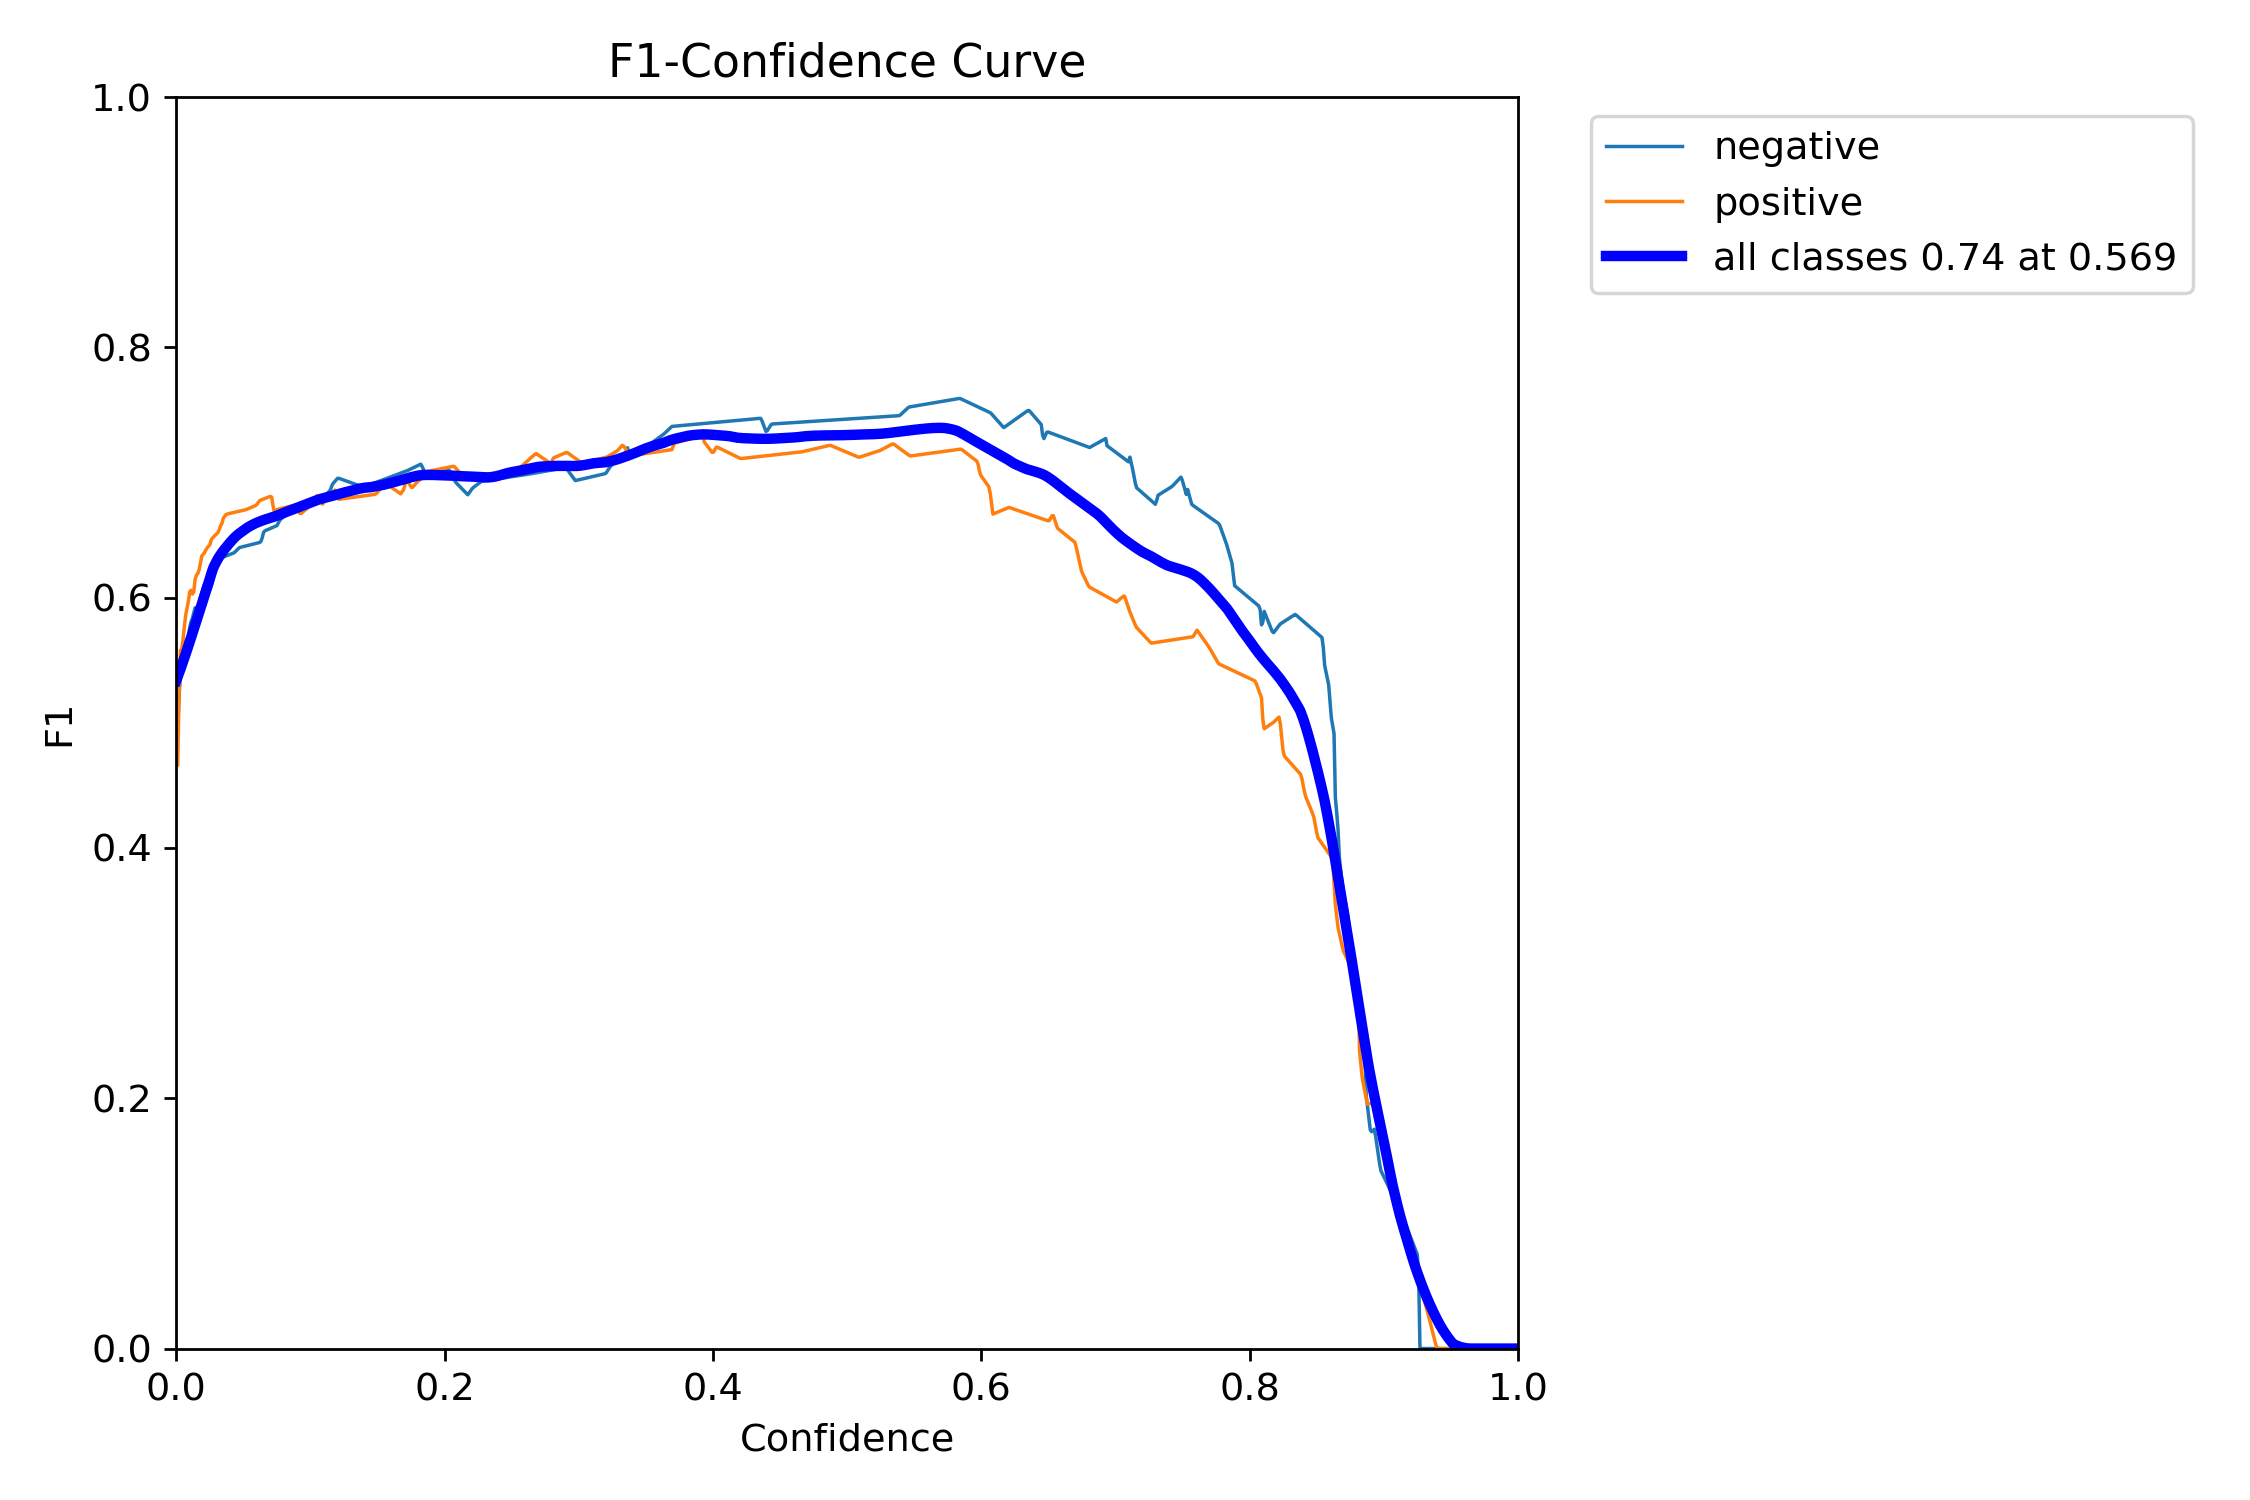

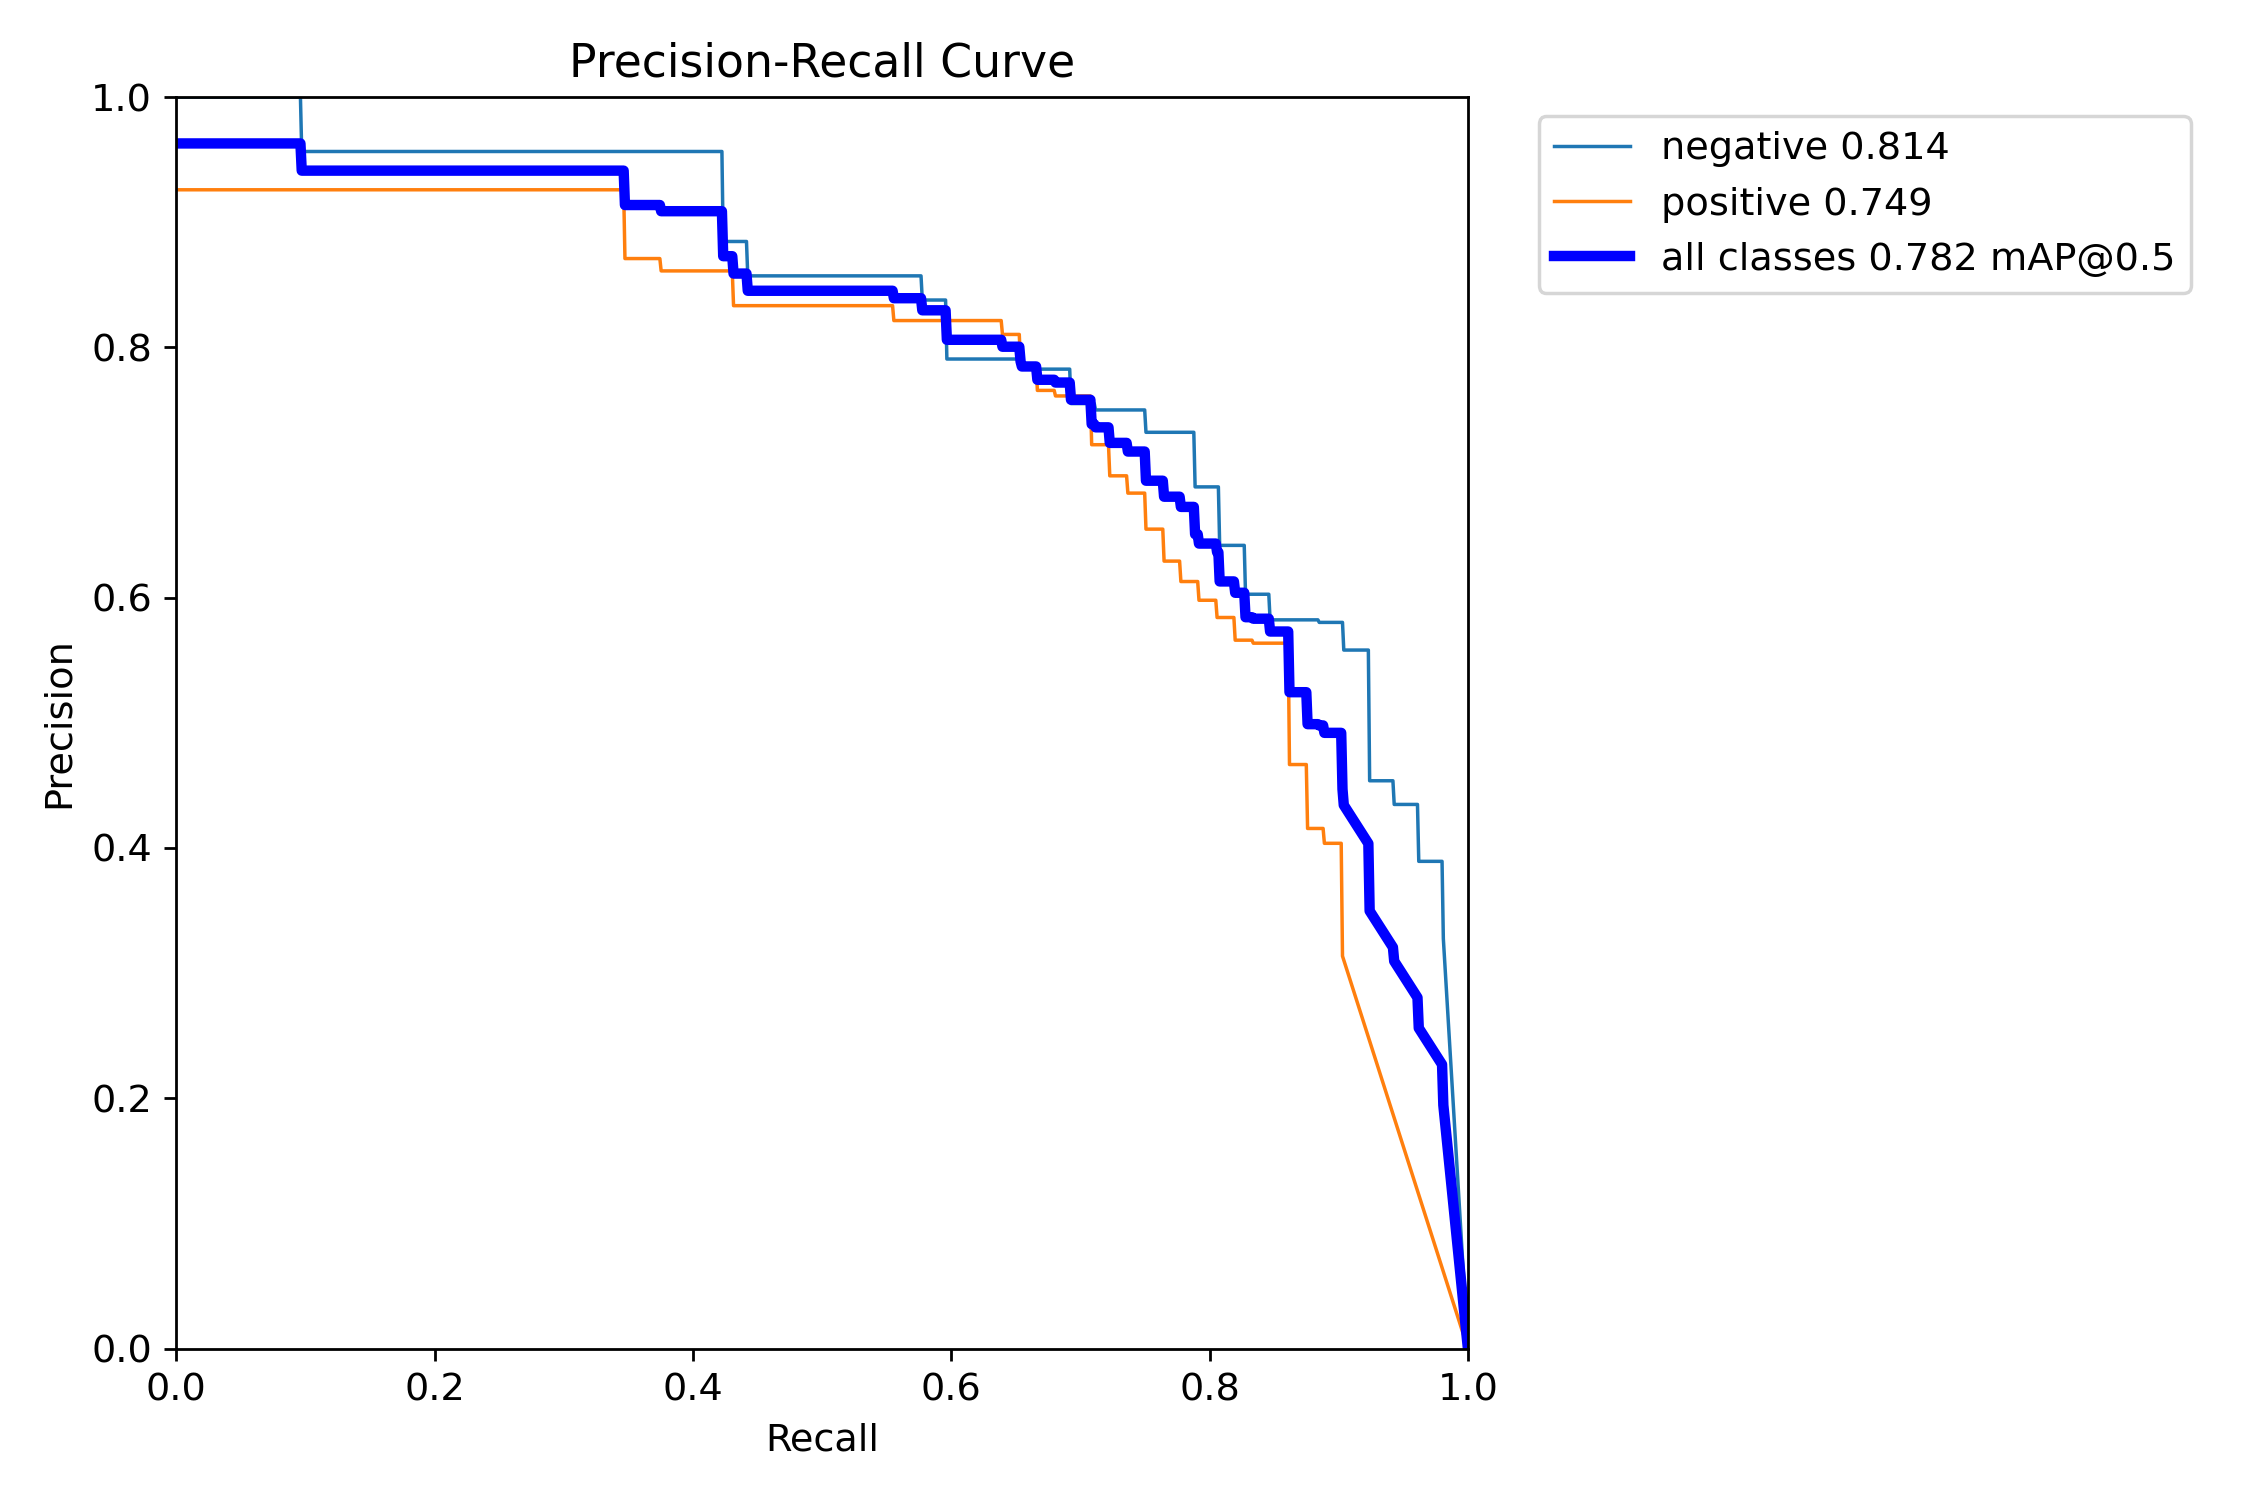

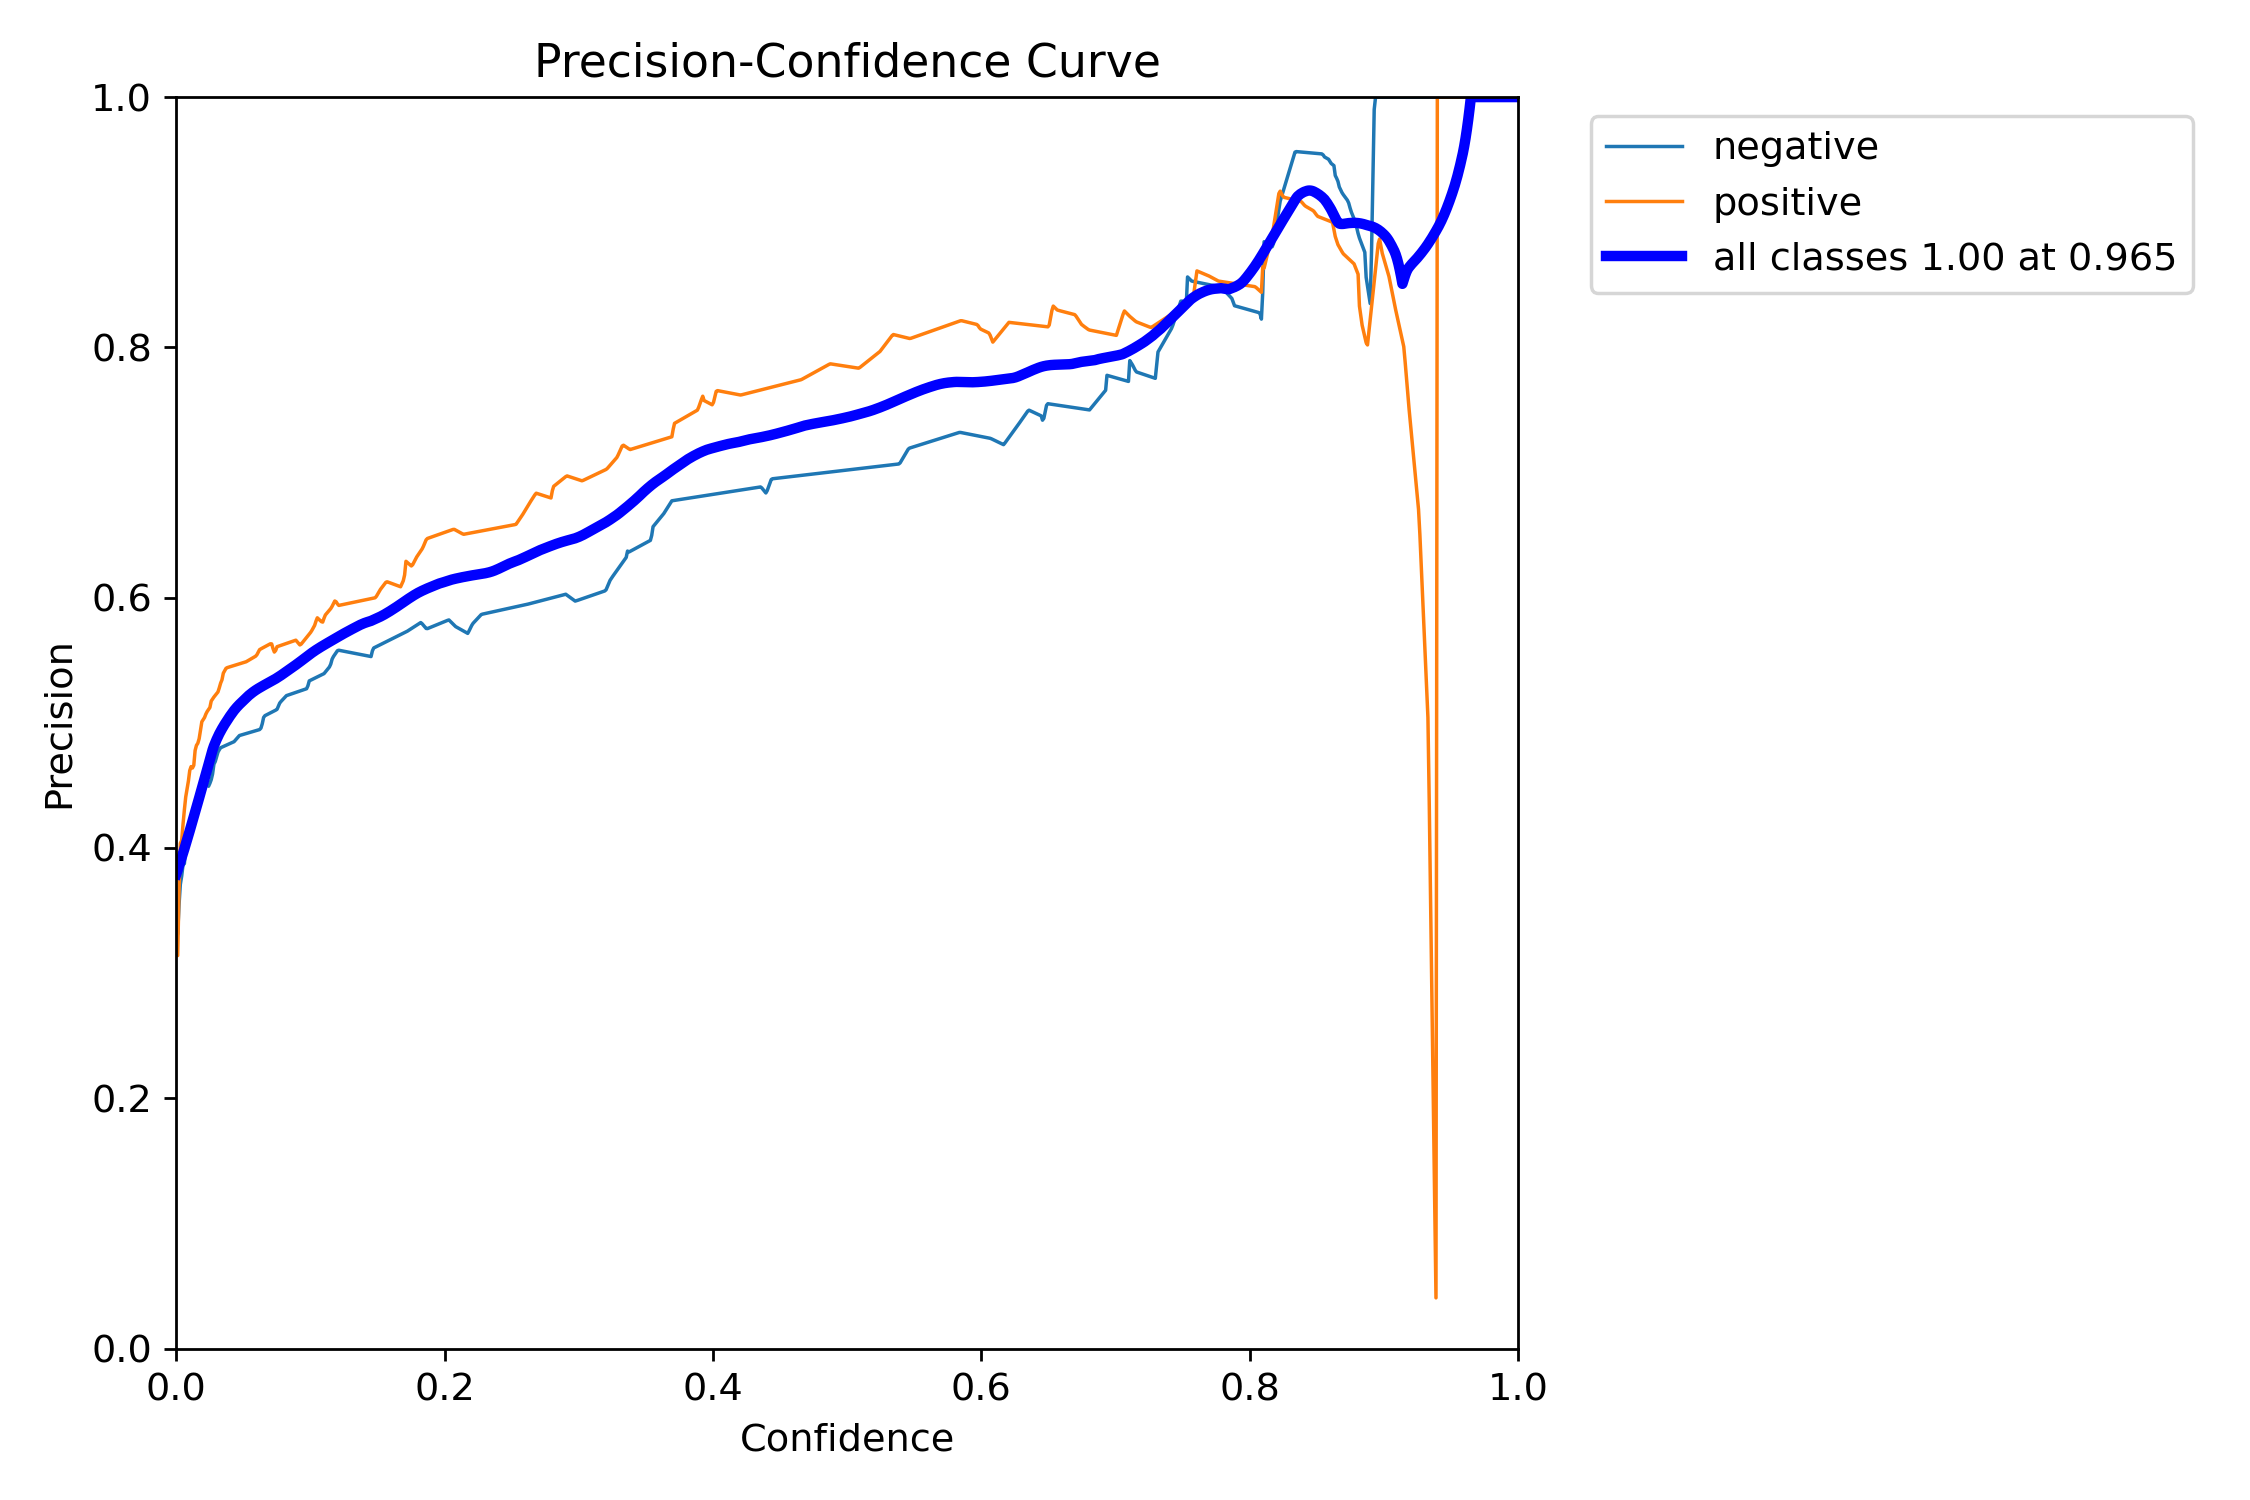

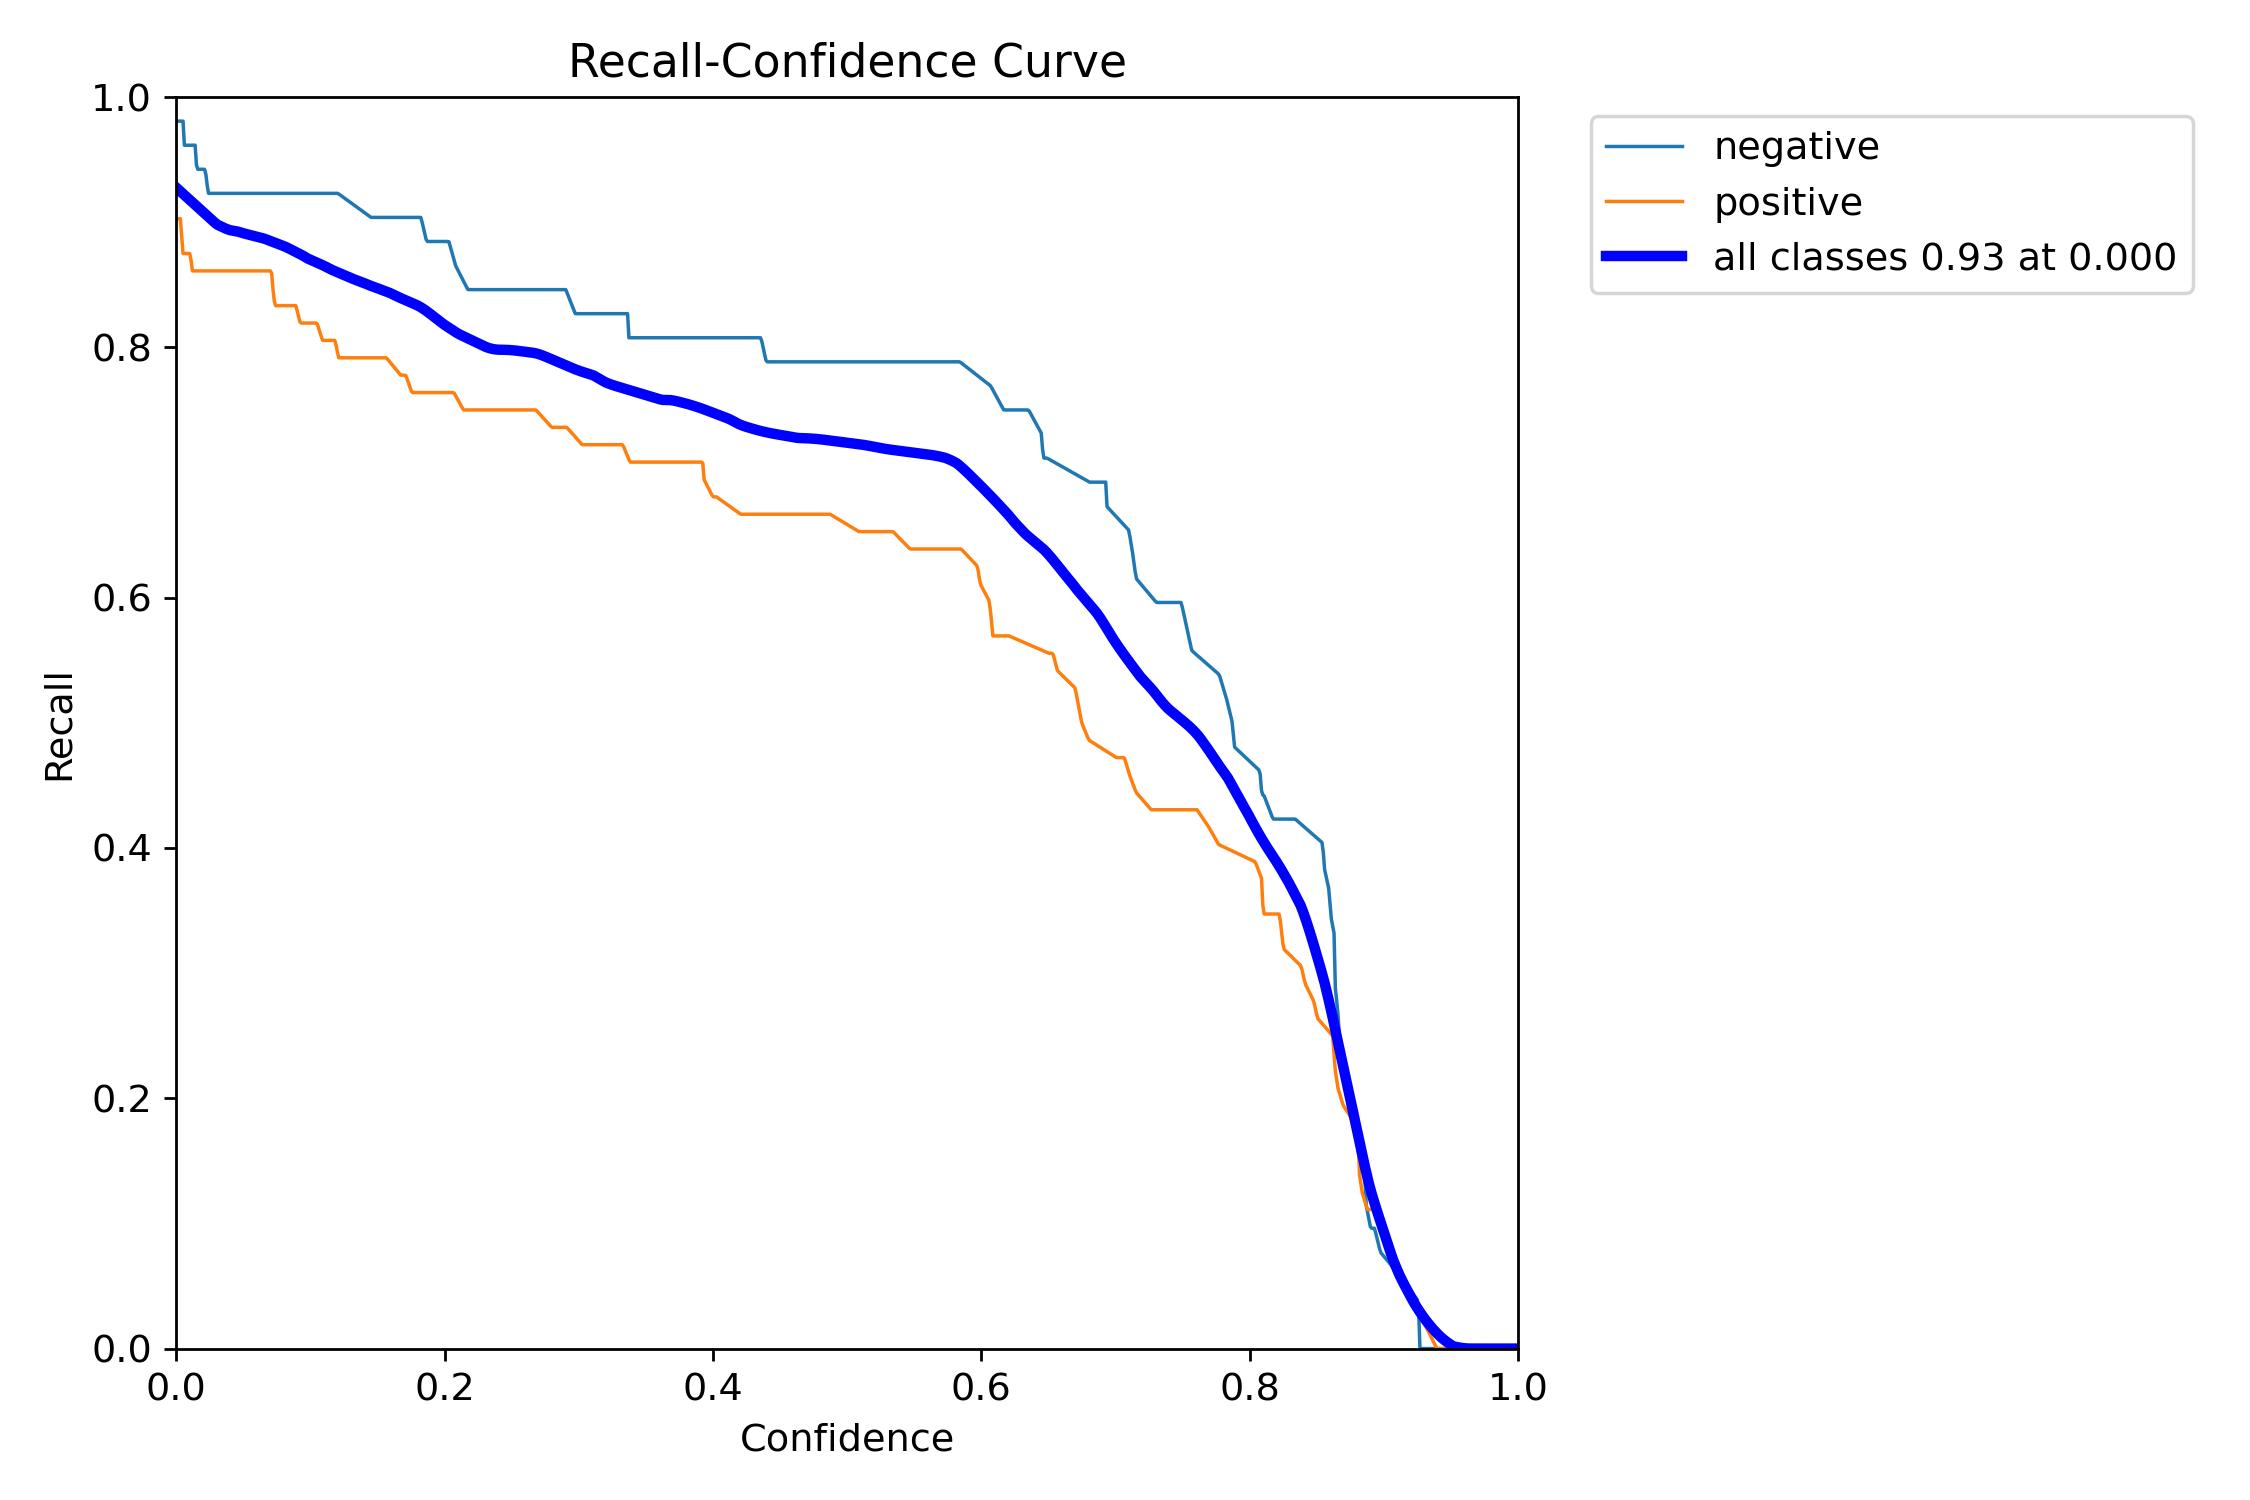

In [33]:
from IPython.display import display, Image
confusion_matrix_path = '/kaggle/working/runs/detect/train4/confusion_matrix.png'
normalized_confusion_path = '/kaggle/working/runs/detect/train4/confusion_matrix_normalized.png'
f1_curve_path = '/kaggle/working/runs/detect/train4/F1_curve.png'
pr_curve_path = '/kaggle/working/runs/detect/train4/PR_curve.png'
p_curve_path = '/kaggle/working/runs/detect/train4/P_curve.png'
r_curve_path = '/kaggle/working/runs/detect/train4/R_curve.png'


# Display different images
display(Image(filename=confusion_matrix_path))
display(Image(filename=normalized_confusion_path))
display(Image(filename=f1_curve_path))
display(Image(filename=pr_curve_path))
display(Image(filename=p_curve_path))
display(Image(filename=r_curve_path))



Processing sagittal test images...

image 1/1 /kaggle/working/dataset_sagittal/images/test/00031_255.jpg: 640x640 1 positive, 9.5ms
Speed: 3.1ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


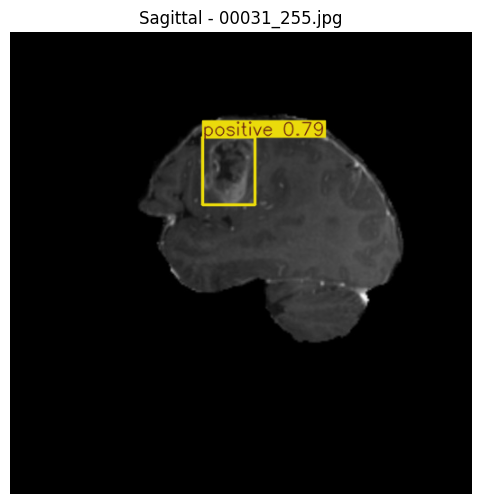


image 1/1 /kaggle/working/dataset_sagittal/images/test/00054_88.jpg: 640x640 1 negative, 12.3ms
Speed: 4.4ms preprocess, 12.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


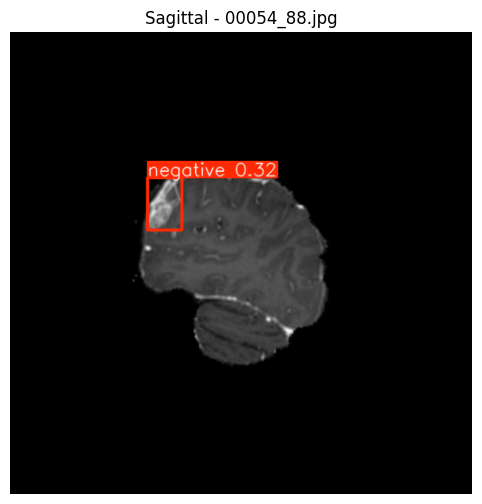


image 1/1 /kaggle/working/dataset_sagittal/images/test/00053_85.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


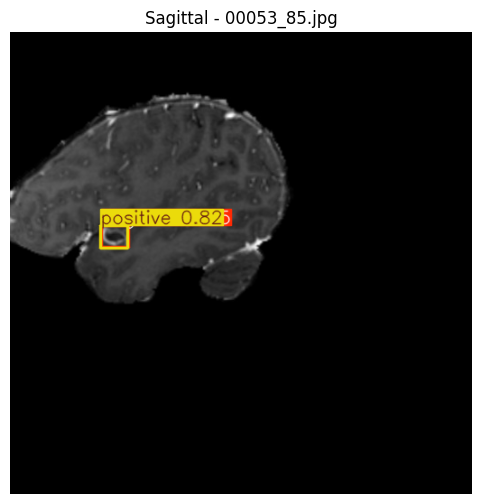


image 1/1 /kaggle/working/dataset_sagittal/images/test/00012_181.jpg: 640x640 (no detections), 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


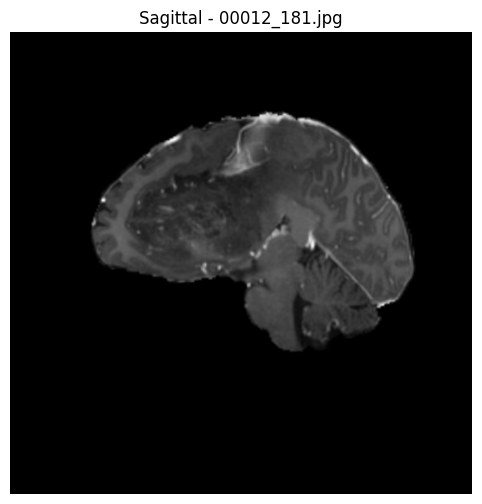


image 1/1 /kaggle/working/dataset_sagittal/images/test/00035_111.jpg: 640x640 1 negative, 12.2ms
Speed: 4.4ms preprocess, 12.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


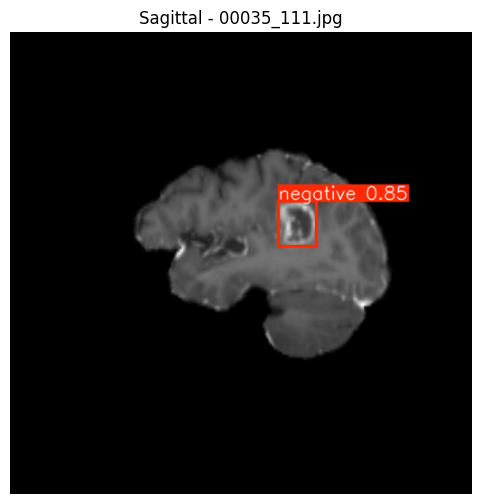


image 1/1 /kaggle/working/dataset_sagittal/images/test/00021_178.jpg: 640x640 1 negative, 8.5ms
Speed: 3.0ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


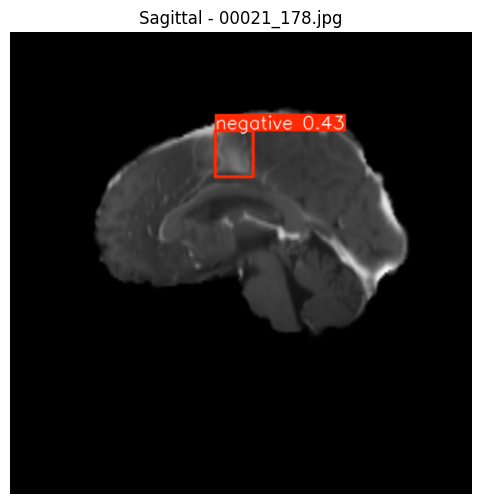


image 1/1 /kaggle/working/dataset_sagittal/images/test/00006_210.jpg: 640x640 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


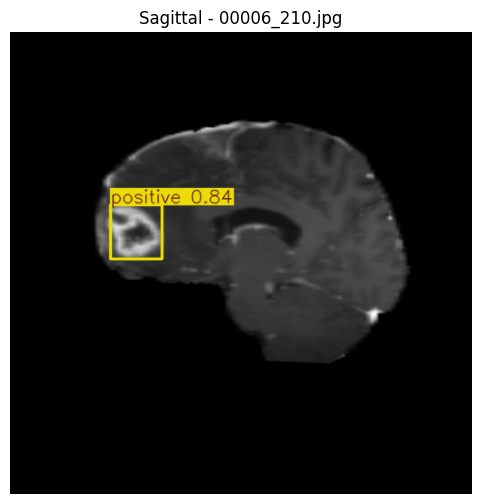


image 1/1 /kaggle/working/dataset_sagittal/images/test/00032_77.jpg: 640x640 1 negative, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


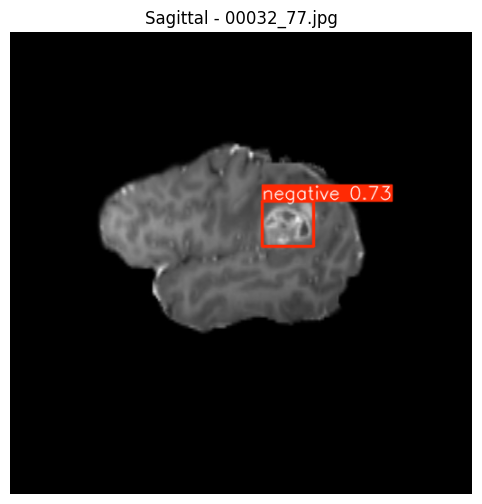


image 1/1 /kaggle/working/dataset_sagittal/images/test/00006_156.jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


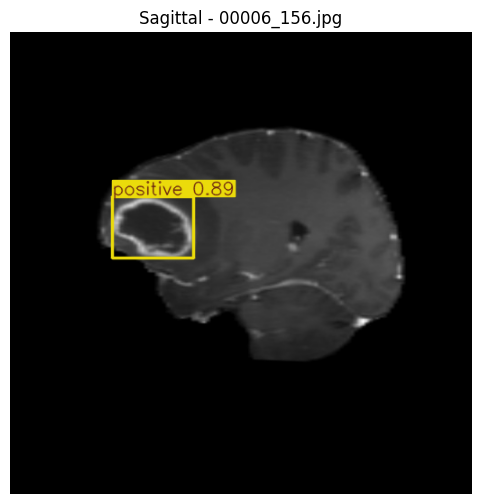


image 1/1 /kaggle/working/dataset_sagittal/images/test/00003_154.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


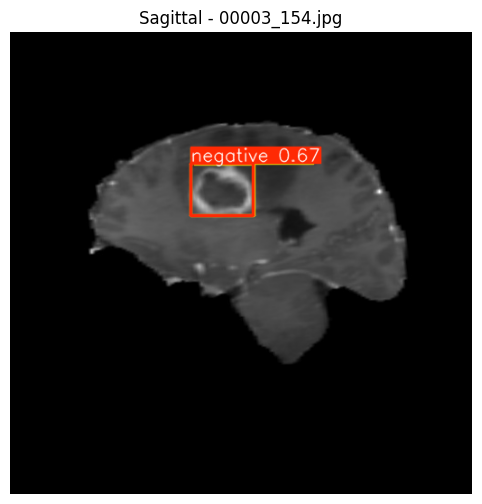


image 1/1 /kaggle/working/dataset_sagittal/images/test/00006_137.jpg: 640x640 1 positive, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


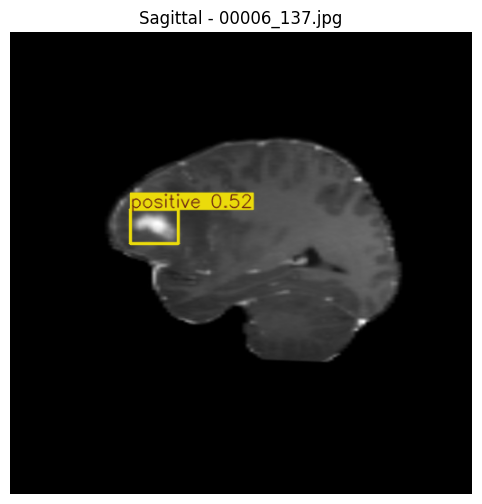


image 1/1 /kaggle/working/dataset_sagittal/images/test/00030_194.jpg: 640x640 1 negative, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


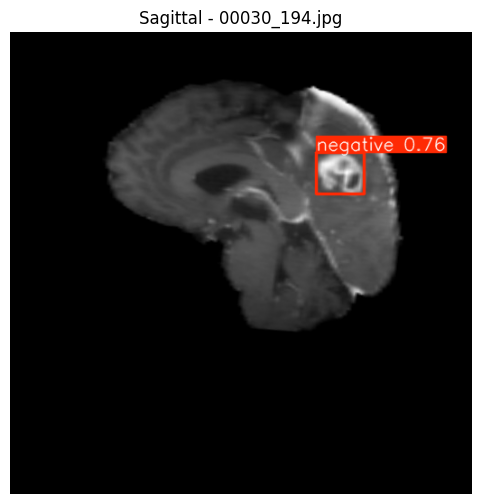


image 1/1 /kaggle/working/dataset_sagittal/images/test/00031_236.jpg: 640x640 1 positive, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


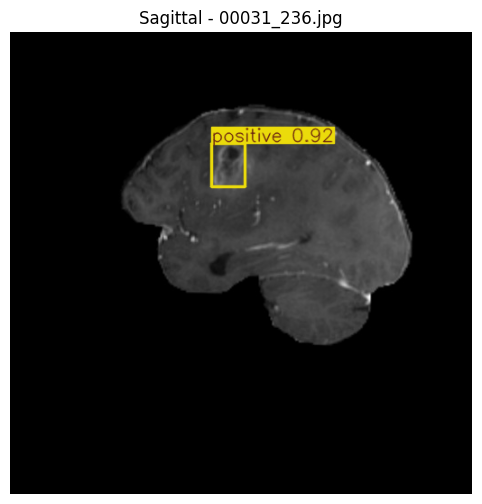


image 1/1 /kaggle/working/dataset_sagittal/images/test/00031_163.jpg: 640x640 1 positive, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


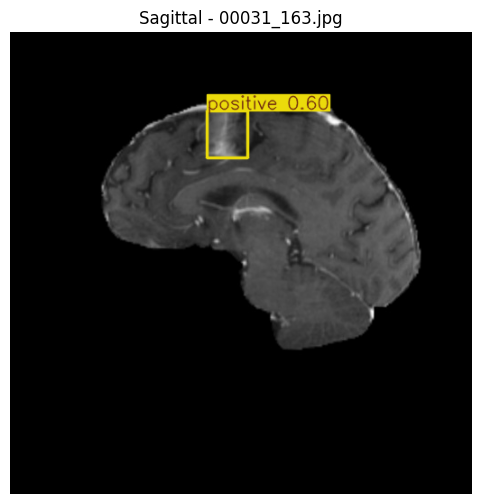


image 1/1 /kaggle/working/dataset_sagittal/images/test/00000_121.jpg: 640x640 1 positive, 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


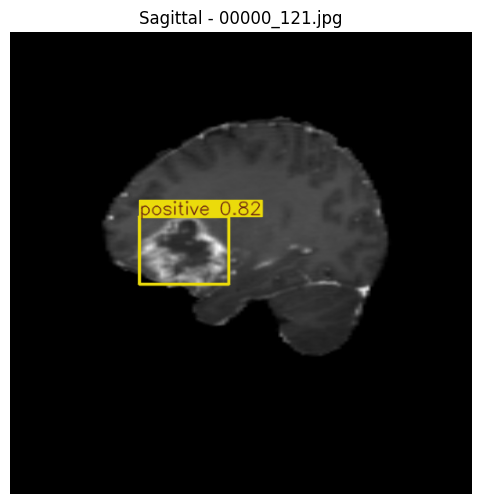


image 1/1 /kaggle/working/dataset_sagittal/images/test/00002_147.jpg: 640x640 1 negative, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


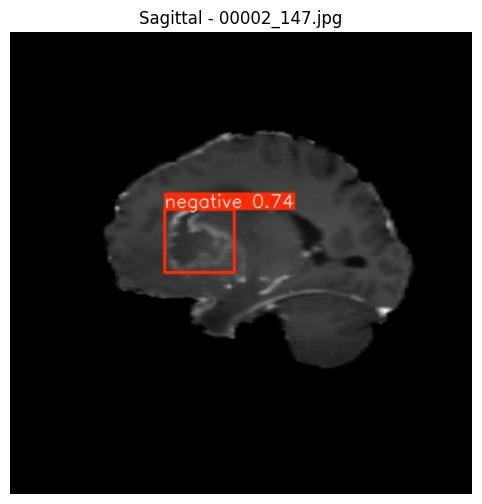


image 1/1 /kaggle/working/dataset_sagittal/images/test/00006_174.jpg: 640x640 1 positive, 8.4ms
Speed: 2.4ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


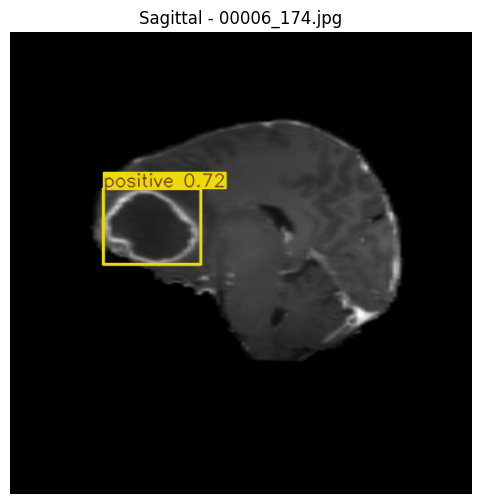


image 1/1 /kaggle/working/dataset_sagittal/images/test/00036_162.jpg: 640x640 2 positives, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


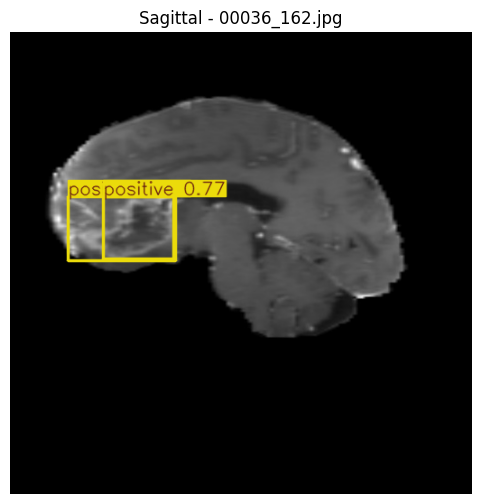


image 1/1 /kaggle/working/dataset_sagittal/images/test/00006_192.jpg: 640x640 1 positive, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


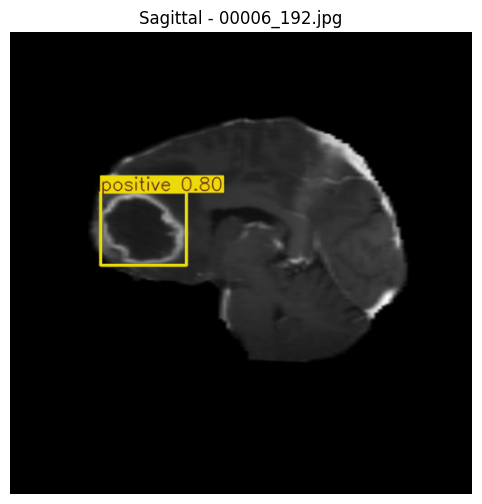


image 1/1 /kaggle/working/dataset_sagittal/images/test/00003_173.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


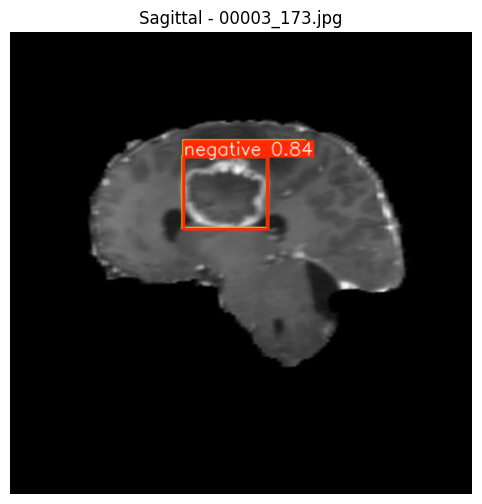


image 1/1 /kaggle/working/dataset_sagittal/images/test/00022_275.jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


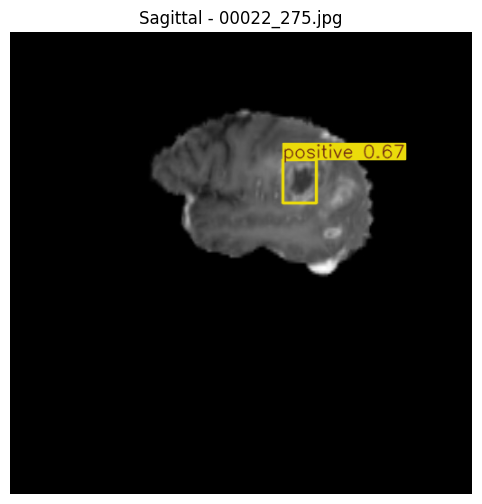


image 1/1 /kaggle/working/dataset_sagittal/images/test/00022_237.jpg: 640x640 3 negatives, 1 positive, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


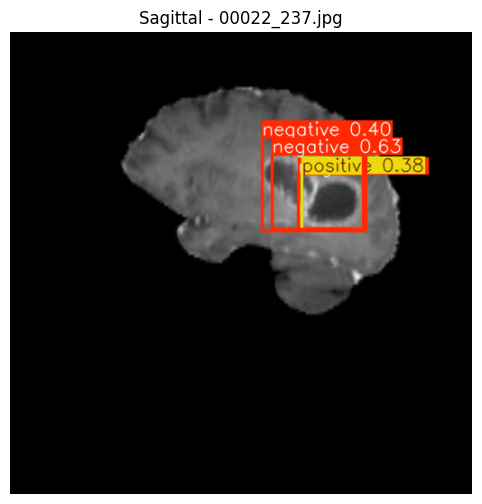


image 1/1 /kaggle/working/dataset_sagittal/images/test/00053_125.jpg: 640x640 1 negative, 3 positives, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


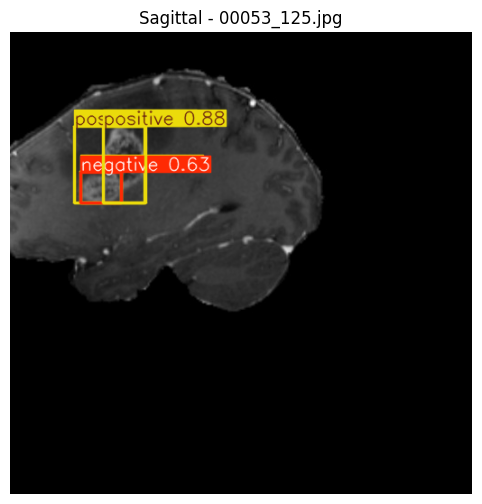


image 1/1 /kaggle/working/dataset_sagittal/images/test/00026_97.jpg: 640x640 1 positive, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


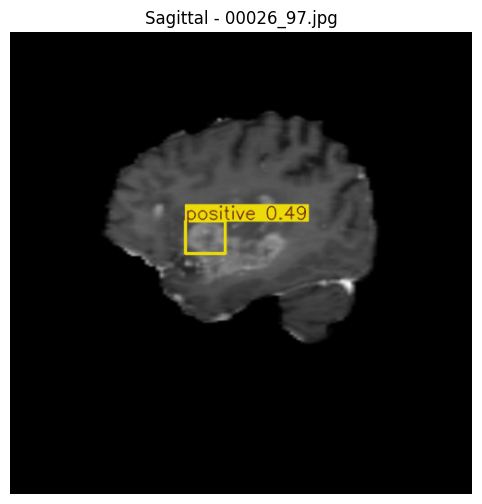


image 1/1 /kaggle/working/dataset_sagittal/images/test/00045_97.jpg: 640x640 1 negative, 1 positive, 8.4ms
Speed: 2.3ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


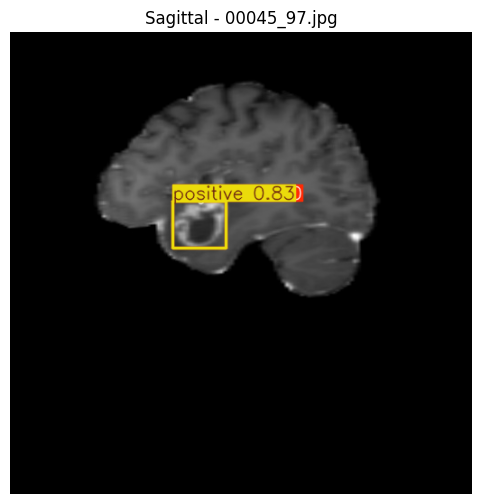


image 1/1 /kaggle/working/dataset_sagittal/images/test/00048_82.jpg: 640x640 1 positive, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


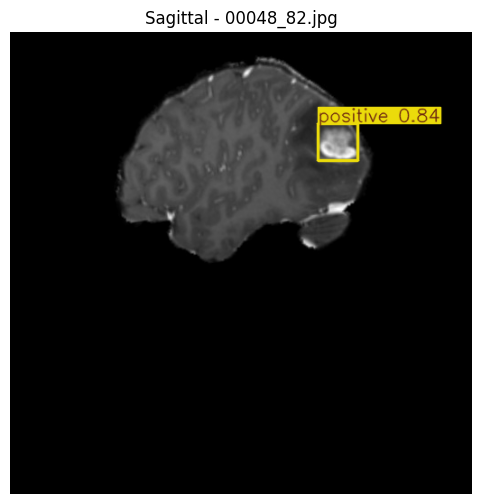


image 1/1 /kaggle/working/dataset_sagittal/images/test/00053_165.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


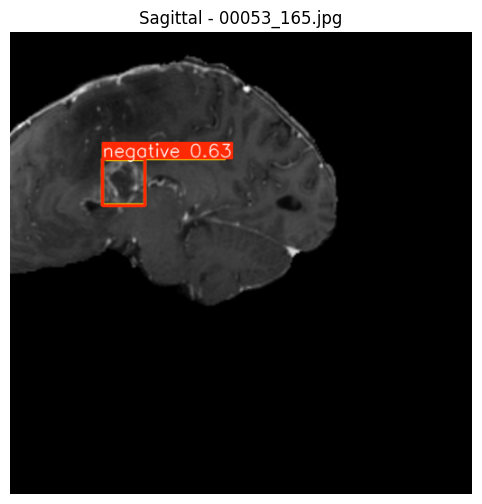


image 1/1 /kaggle/working/dataset_sagittal/images/test/00043_96.jpg: 640x640 1 positive, 8.4ms
Speed: 3.2ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


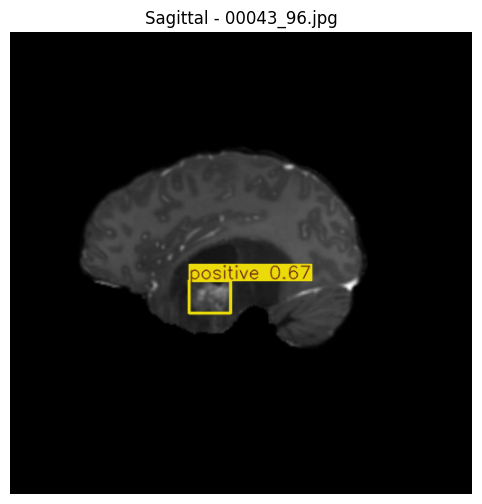


image 1/1 /kaggle/working/dataset_sagittal/images/test/00000_102.jpg: 640x640 1 positive, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


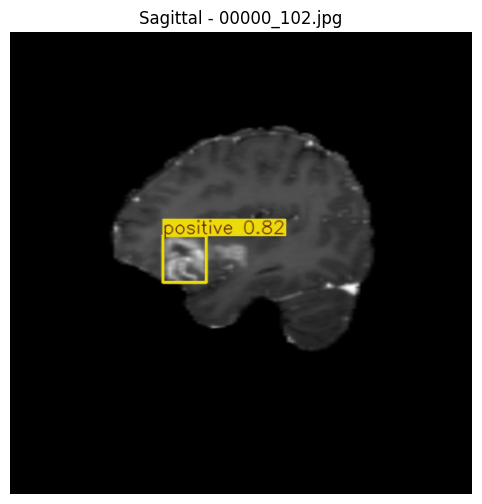


image 1/1 /kaggle/working/dataset_sagittal/images/test/00045_117.jpg: 640x640 1 positive, 8.5ms
Speed: 3.0ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


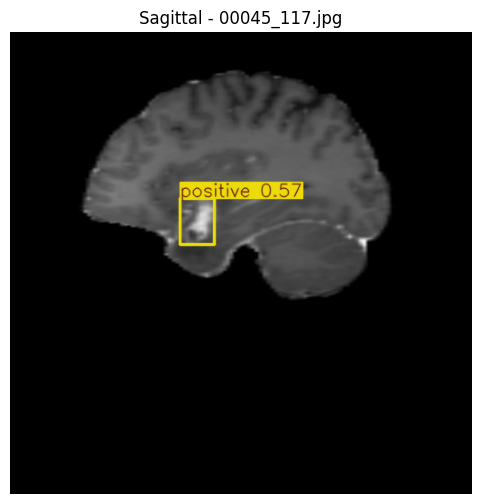


image 1/1 /kaggle/working/dataset_sagittal/images/test/00009_110.jpg: 640x640 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


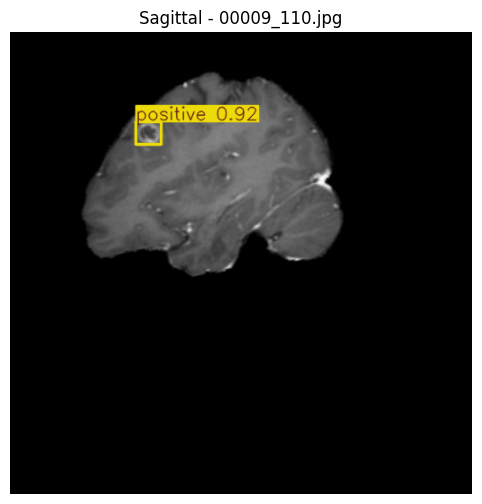


image 1/1 /kaggle/working/dataset_sagittal/images/test/00030_257.jpg: 640x640 1 negative, 1 positive, 8.4ms
Speed: 2.8ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


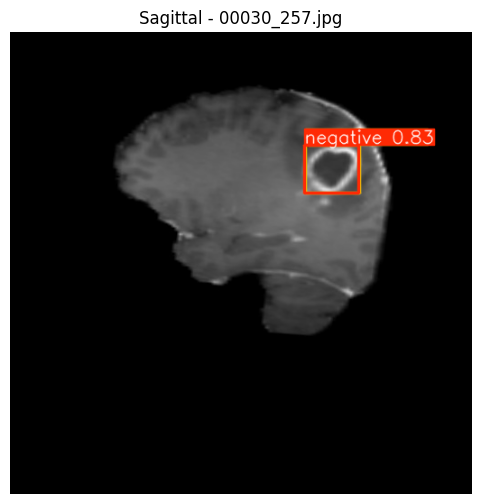


image 1/1 /kaggle/working/dataset_sagittal/images/test/00049_102.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


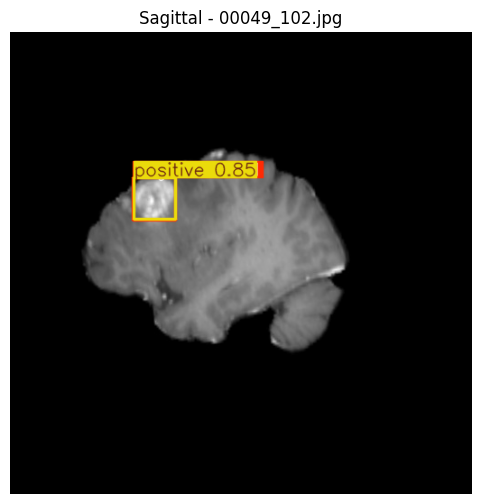


image 1/1 /kaggle/working/dataset_sagittal/images/test/00054_126.jpg: 640x640 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


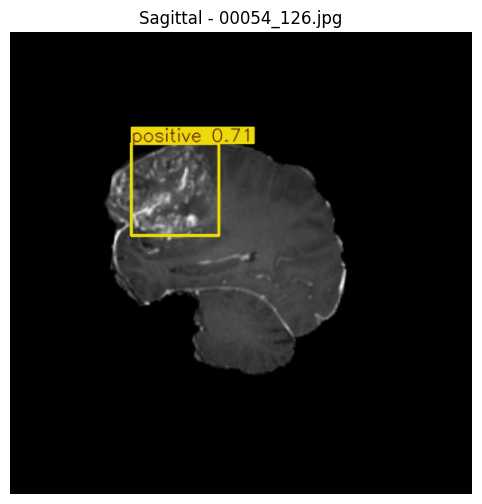


image 1/1 /kaggle/working/dataset_sagittal/images/test/00011_277.jpg: 640x640 1 positive, 8.5ms
Speed: 3.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


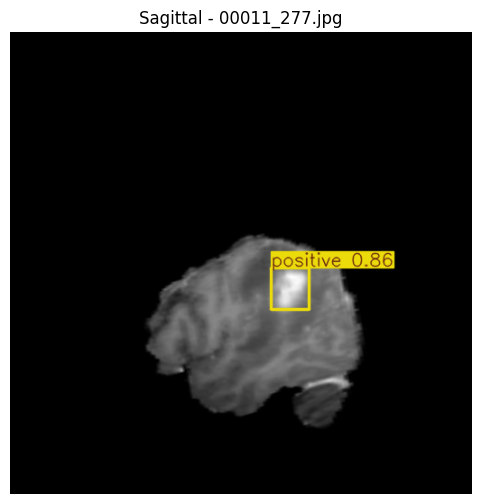


image 1/1 /kaggle/working/dataset_sagittal/images/test/00030_236.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


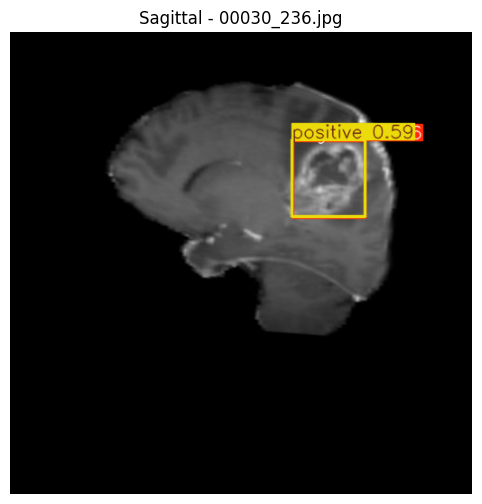


image 1/1 /kaggle/working/dataset_sagittal/images/test/00048_121.jpg: 640x640 2 negatives, 1 positive, 9.1ms
Speed: 3.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


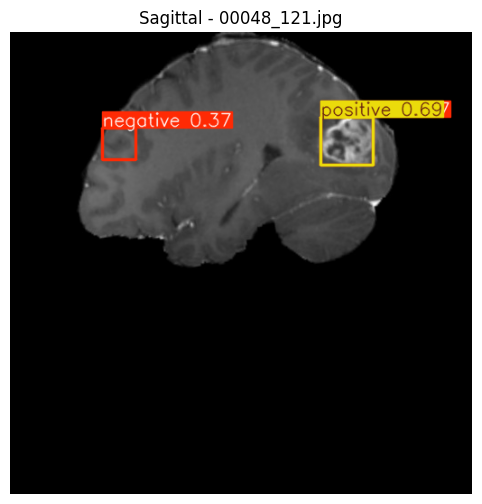


image 1/1 /kaggle/working/dataset_sagittal/images/test/00003_192.jpg: 640x640 1 negative, 1 positive, 9.7ms
Speed: 3.5ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


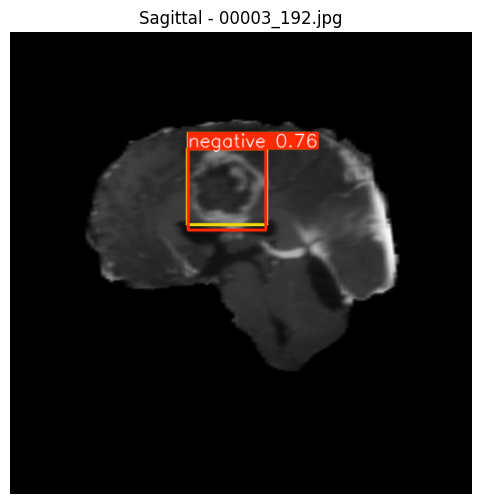


image 1/1 /kaggle/working/dataset_sagittal/images/test/00000_159.jpg: 640x640 1 positive, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


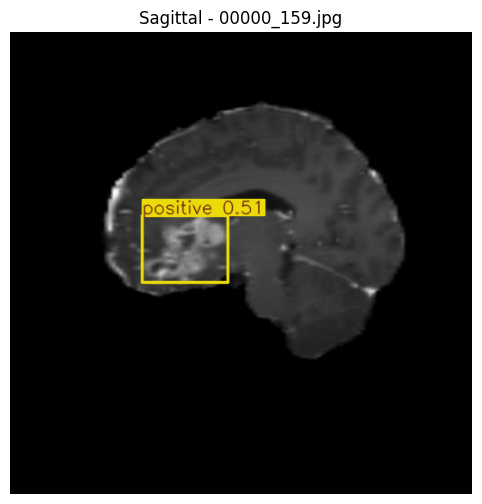


image 1/1 /kaggle/working/dataset_sagittal/images/test/00030_215.jpg: 640x640 2 positives, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


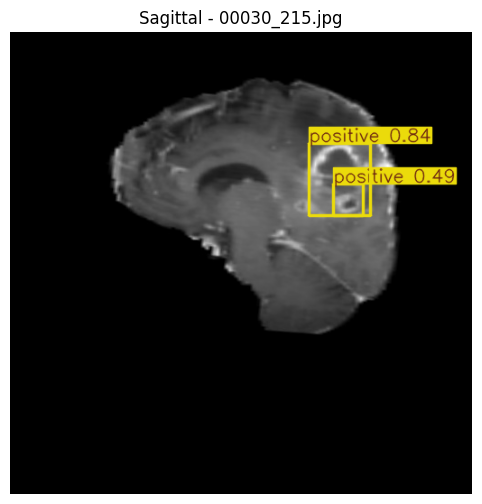


Processing coronal test images...

image 1/1 /kaggle/working/dataset_coronal/images/test/56 (2).jpg: 640x640 1 positive, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


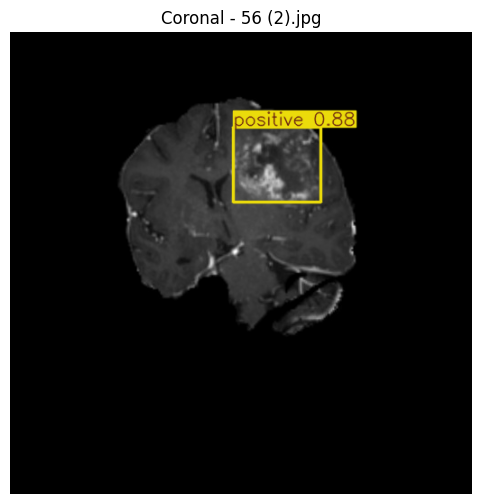


image 1/1 /kaggle/working/dataset_coronal/images/test/34.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


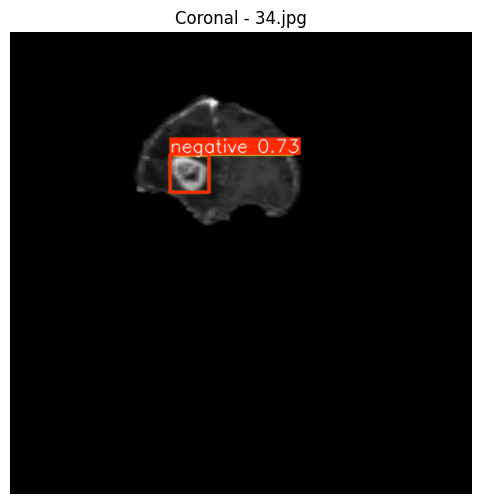


image 1/1 /kaggle/working/dataset_coronal/images/test/59 (2).jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


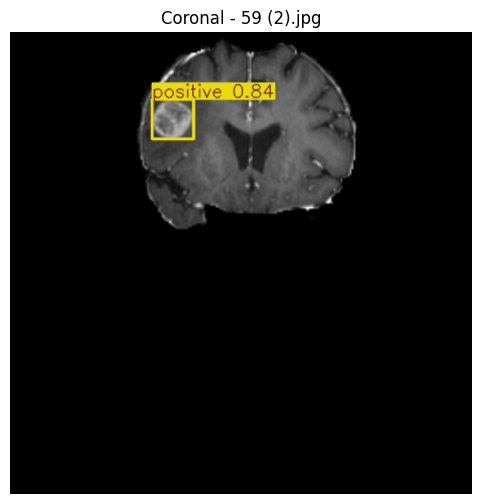


image 1/1 /kaggle/working/dataset_coronal/images/test/60.jpg: 640x640 1 negative, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


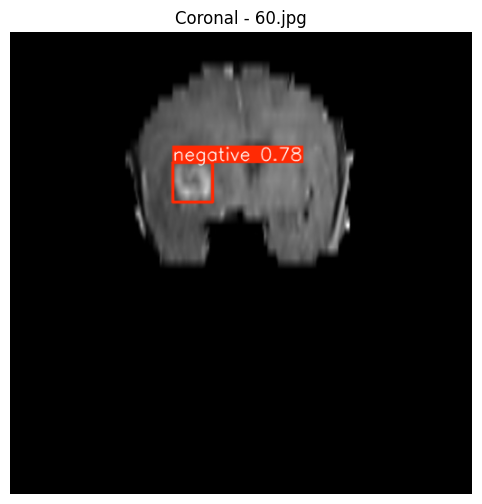


image 1/1 /kaggle/working/dataset_coronal/images/test/59 (4).jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


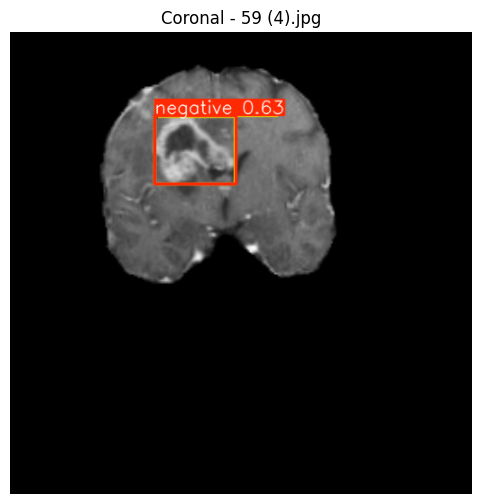


image 1/1 /kaggle/working/dataset_coronal/images/test/58 (6).jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


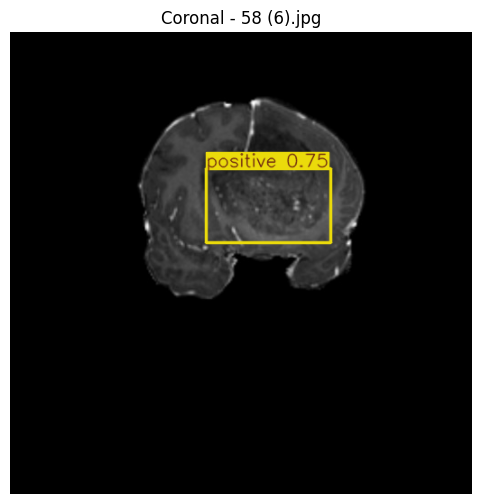


image 1/1 /kaggle/working/dataset_coronal/images/test/60 (9).jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


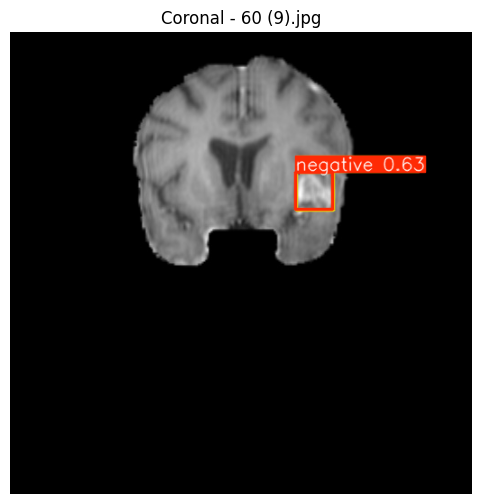


image 1/1 /kaggle/working/dataset_coronal/images/test/54 (4).jpg: 640x640 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


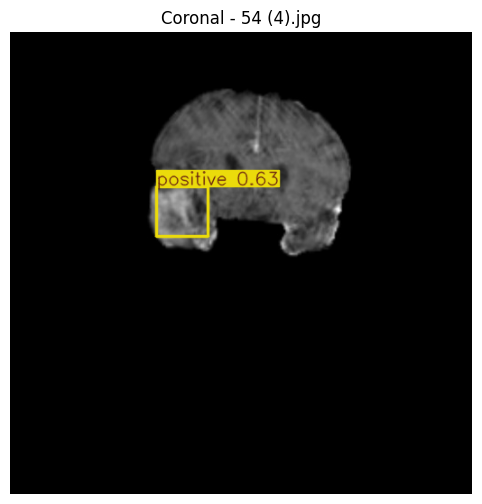


image 1/1 /kaggle/working/dataset_coronal/images/test/57 (4).jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


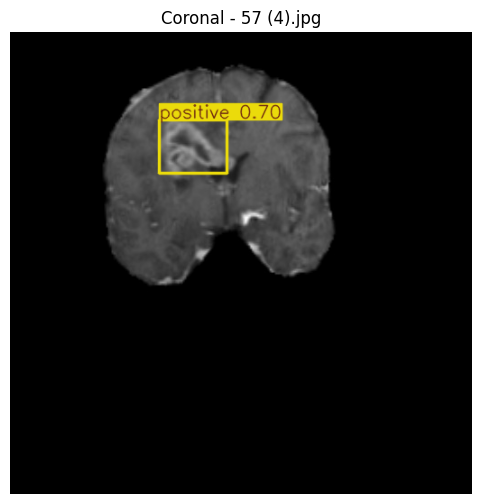


image 1/1 /kaggle/working/dataset_coronal/images/test/36.jpg: 640x640 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


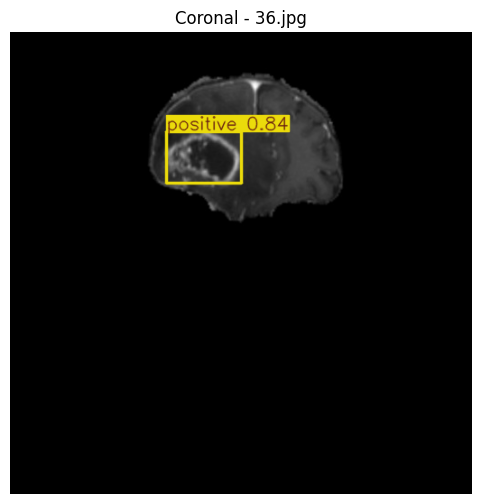


image 1/1 /kaggle/working/dataset_coronal/images/test/60 (6).jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


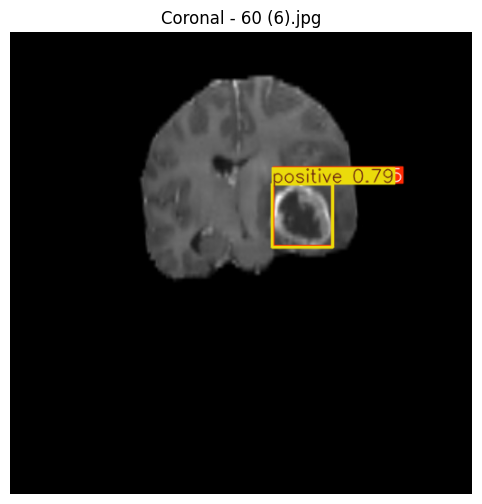


image 1/1 /kaggle/working/dataset_coronal/images/test/53 (3).jpg: 640x640 1 negative, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


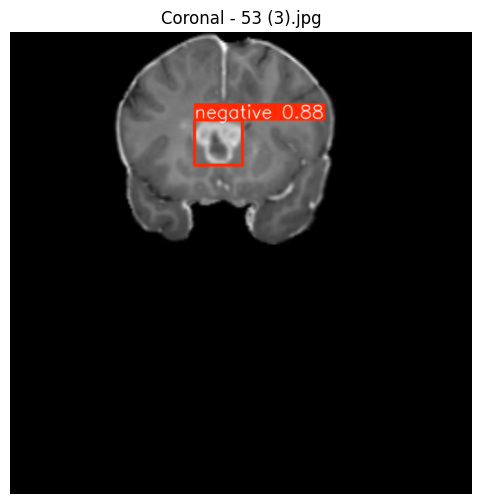


image 1/1 /kaggle/working/dataset_coronal/images/test/48.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


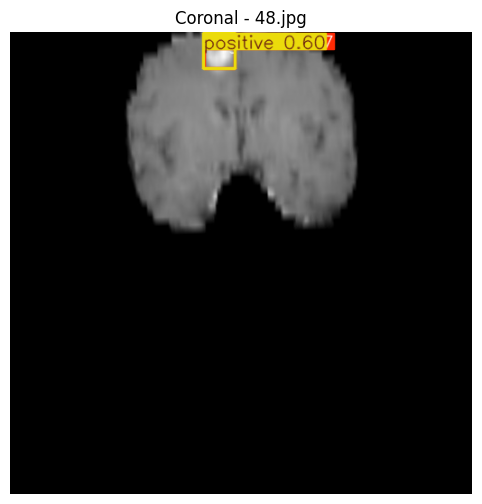


image 1/1 /kaggle/working/dataset_coronal/images/test/59 (3).jpg: 640x640 (no detections), 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


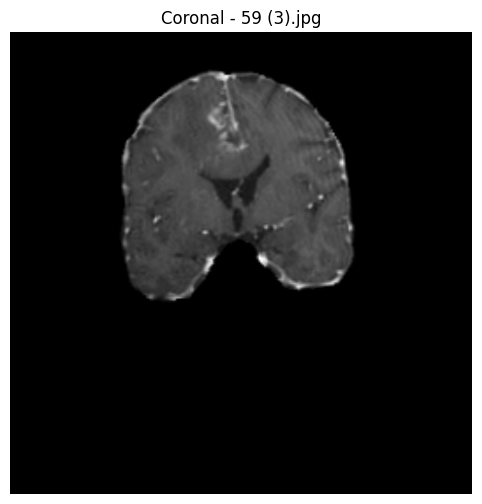


image 1/1 /kaggle/working/dataset_coronal/images/test/46.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


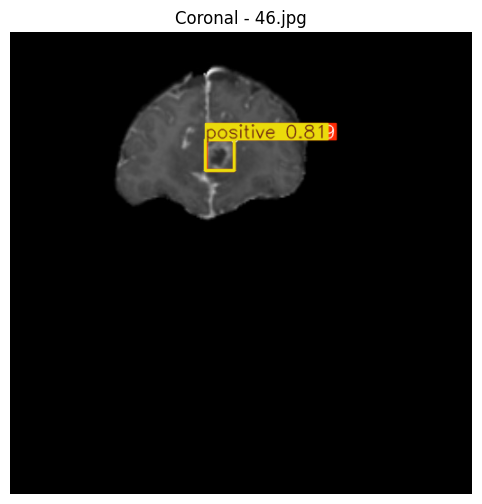


image 1/1 /kaggle/working/dataset_coronal/images/test/19.jpg: 640x640 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


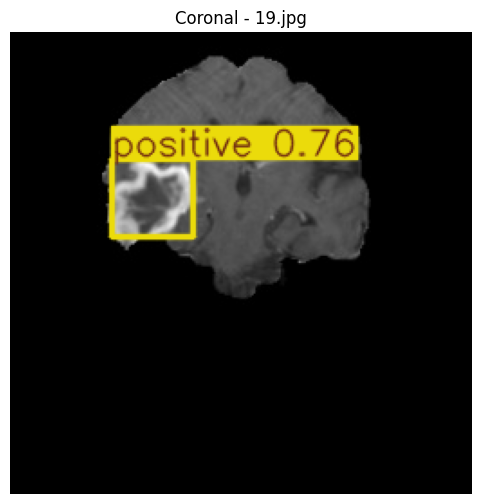


image 1/1 /kaggle/working/dataset_coronal/images/test/53.jpg: 640x640 2 positives, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


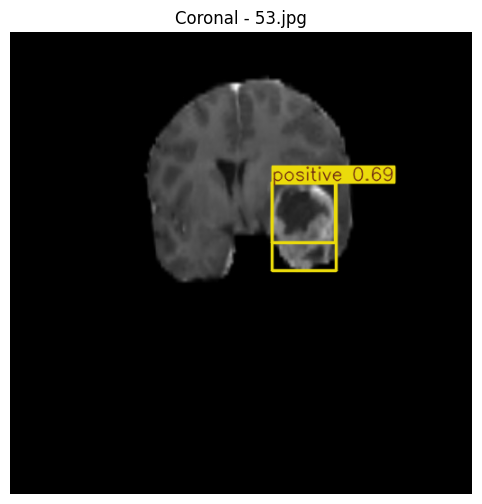


image 1/1 /kaggle/working/dataset_coronal/images/test/20.jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


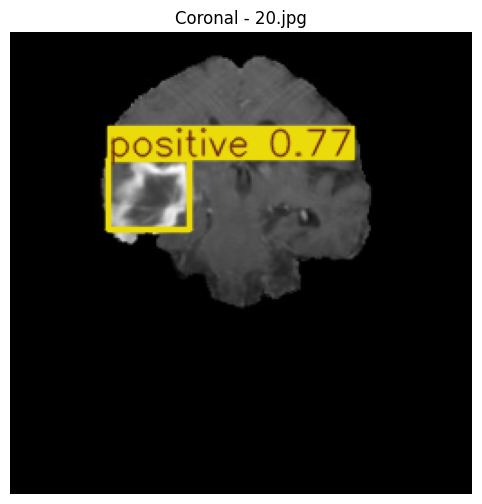


image 1/1 /kaggle/working/dataset_coronal/images/test/53 (4).jpg: 640x640 (no detections), 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


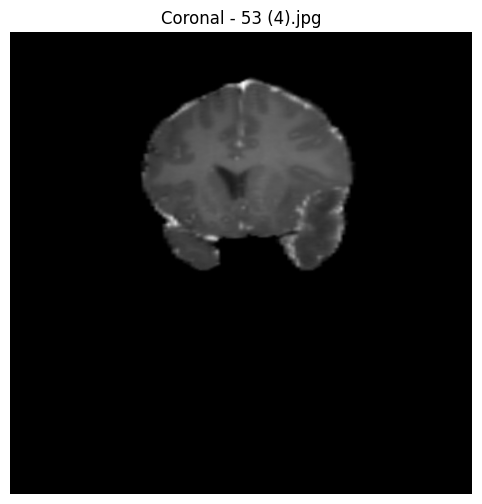


image 1/1 /kaggle/working/dataset_coronal/images/test/59 (7).jpg: 640x640 1 negative, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


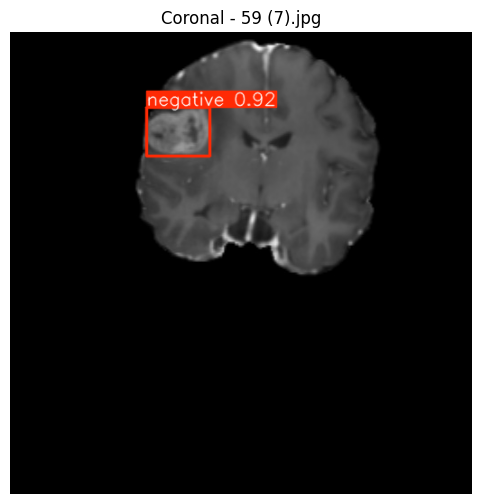


image 1/1 /kaggle/working/dataset_coronal/images/test/60 (3).jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


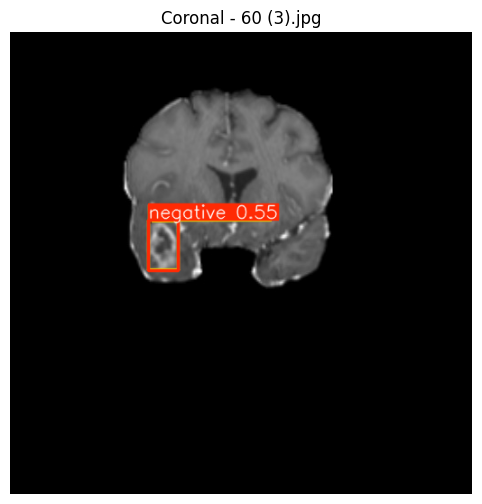


image 1/1 /kaggle/working/dataset_coronal/images/test/55.jpg: 640x640 1 negative, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


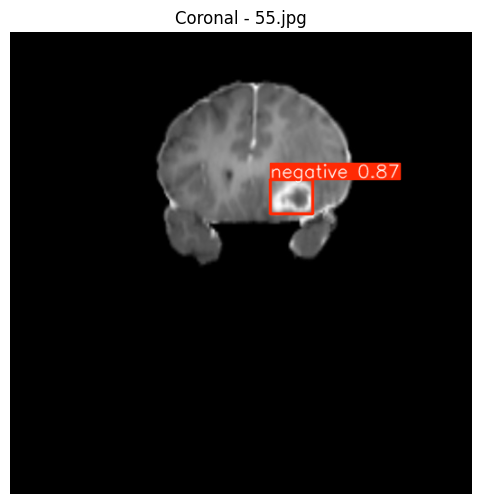


image 1/1 /kaggle/working/dataset_coronal/images/test/44.jpg: 640x640 1 negative, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


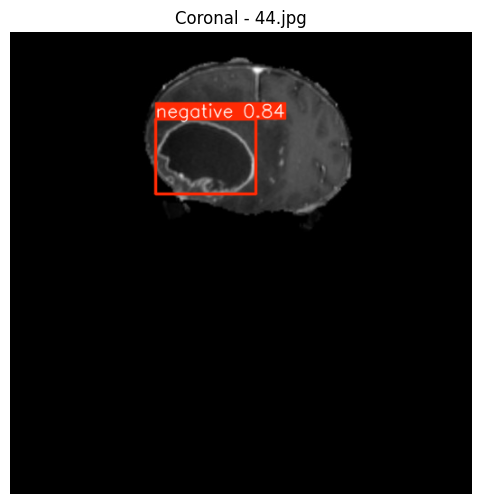


image 1/1 /kaggle/working/dataset_coronal/images/test/48 (4).jpg: 640x640 2 negatives, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


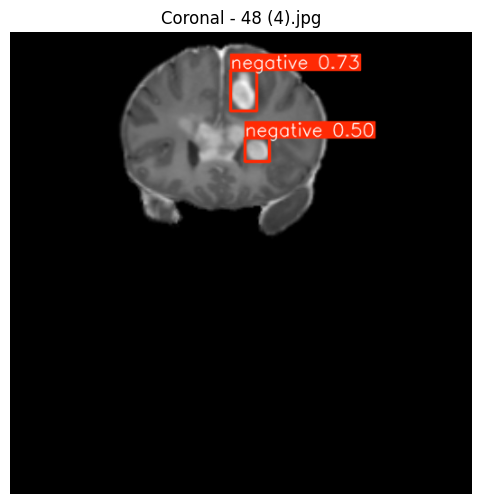


image 1/1 /kaggle/working/dataset_coronal/images/test/58 (4).jpg: 640x640 3 positives, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


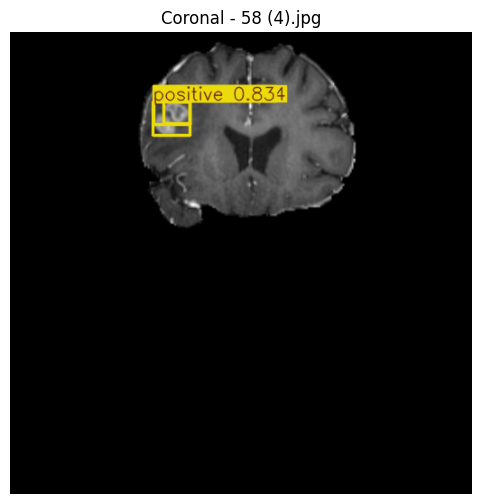


image 1/1 /kaggle/working/dataset_coronal/images/test/38.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


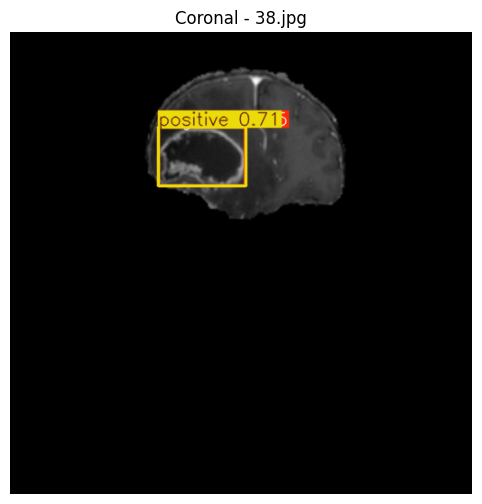


image 1/1 /kaggle/working/dataset_coronal/images/test/58.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


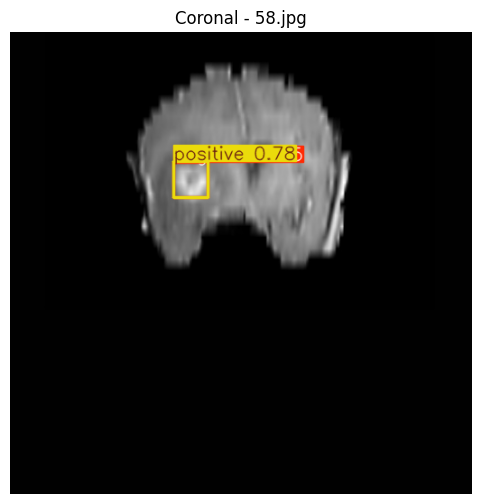


image 1/1 /kaggle/working/dataset_coronal/images/test/17.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


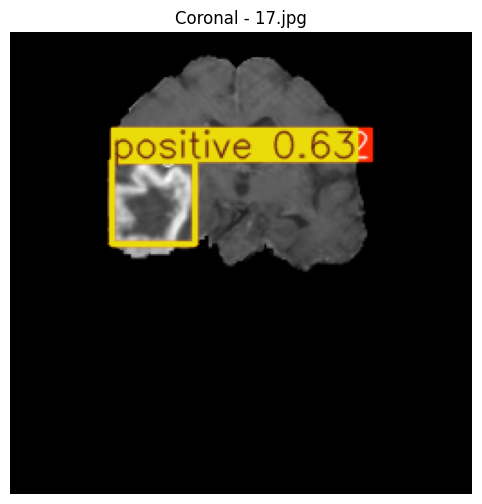


image 1/1 /kaggle/working/dataset_coronal/images/test/46 (3).jpg: 640x640 1 positive, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


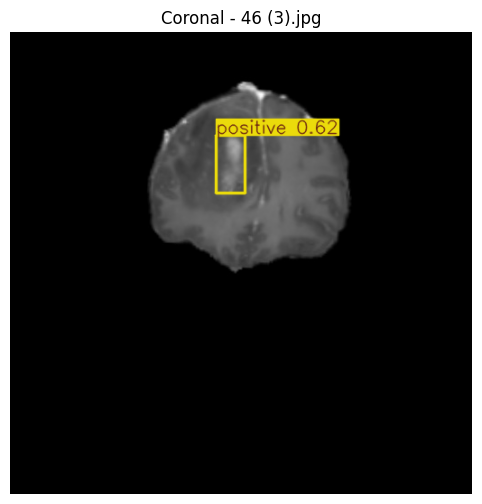


image 1/1 /kaggle/working/dataset_coronal/images/test/54.jpg: 640x640 1 negative, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


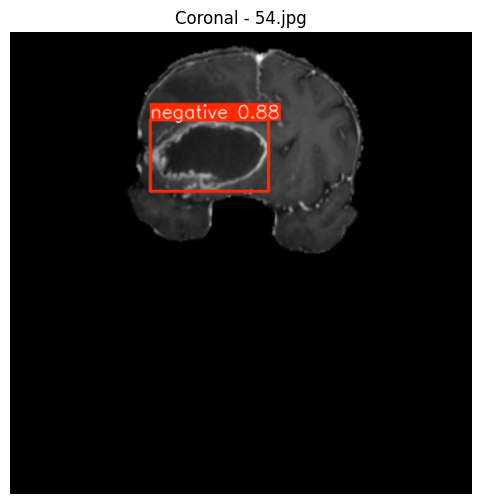


image 1/1 /kaggle/working/dataset_coronal/images/test/58 (5).jpg: 640x640 1 positive, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


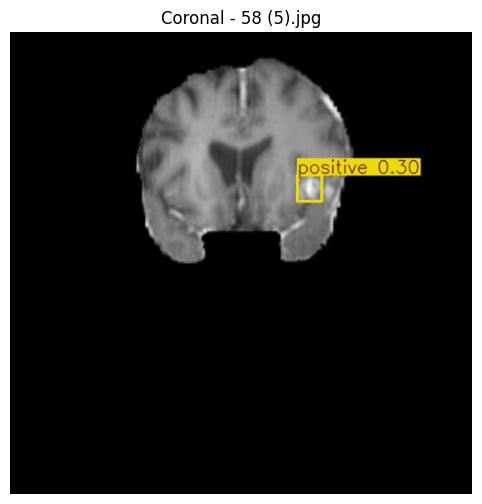


image 1/1 /kaggle/working/dataset_coronal/images/test/57 (5).jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


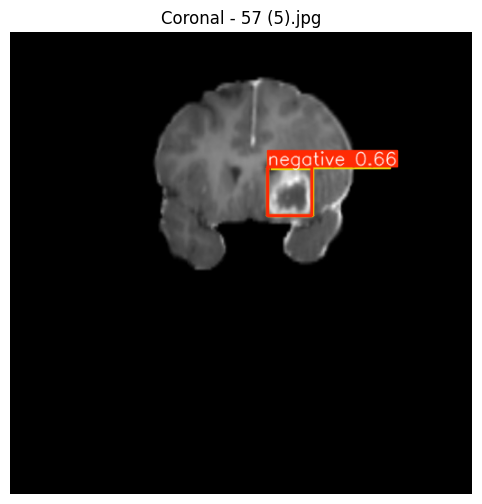


image 1/1 /kaggle/working/dataset_coronal/images/test/61 (2).jpg: 640x640 2 negatives, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


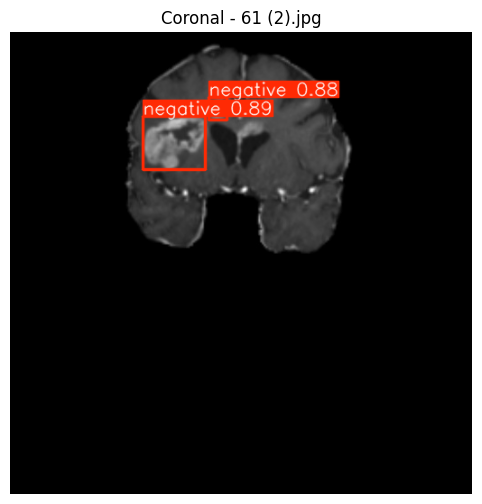


image 1/1 /kaggle/working/dataset_coronal/images/test/60 (11).jpg: 640x640 1 positive, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


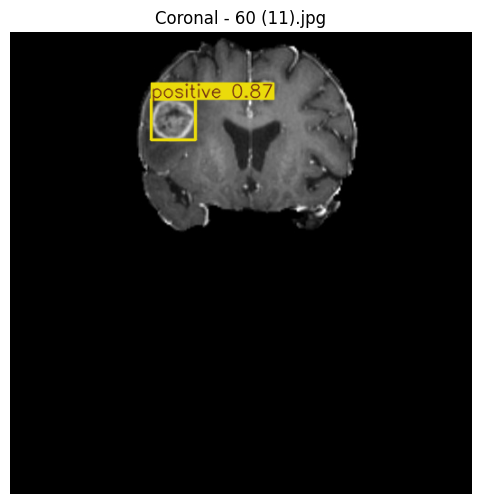


image 1/1 /kaggle/working/dataset_coronal/images/test/41.jpg: 640x640 1 negative, 1 positive, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


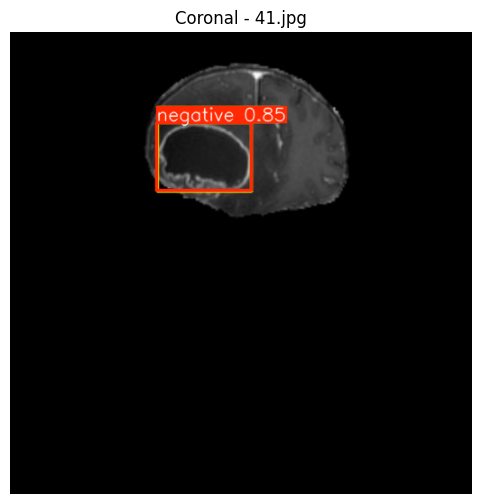


image 1/1 /kaggle/working/dataset_coronal/images/test/48 (5).jpg: 640x640 (no detections), 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


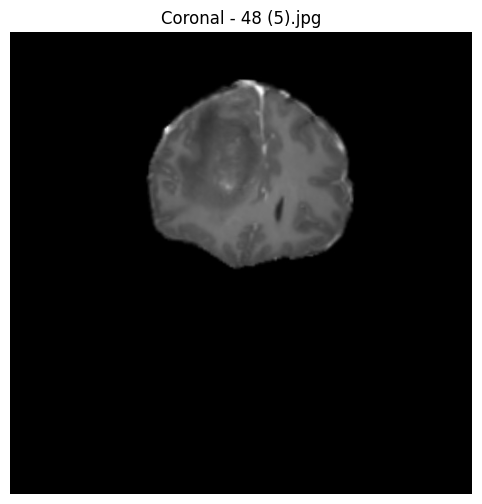


image 1/1 /kaggle/working/dataset_coronal/images/test/60 (8).jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


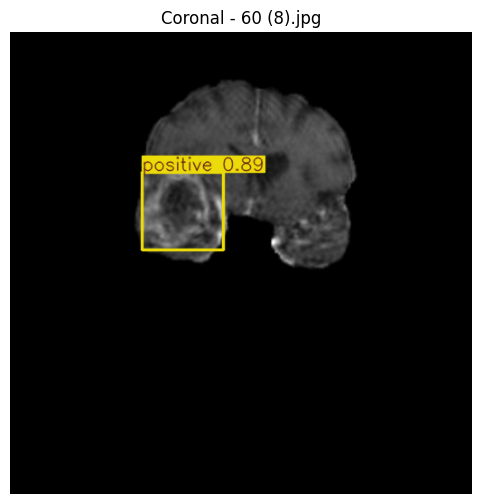


image 1/1 /kaggle/working/dataset_coronal/images/test/60 (7).jpg: 640x640 1 positive, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


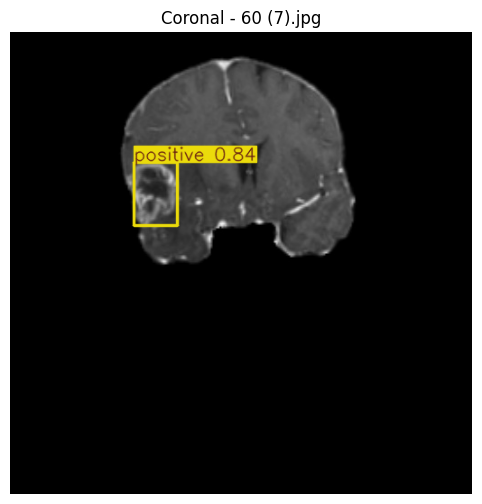


image 1/1 /kaggle/working/dataset_coronal/images/test/46 (2).jpg: 640x640 1 positive, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


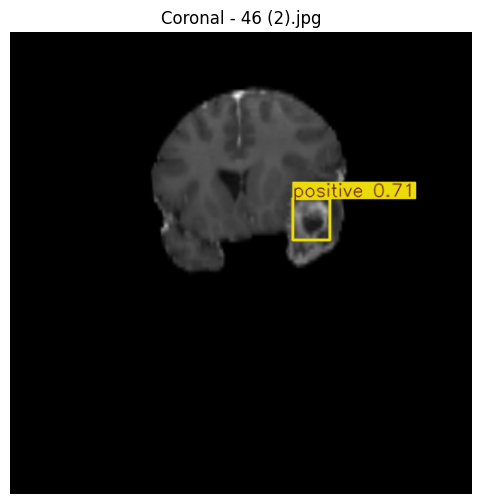


image 1/1 /kaggle/working/dataset_coronal/images/test/60 (2).jpg: 640x640 1 negative, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


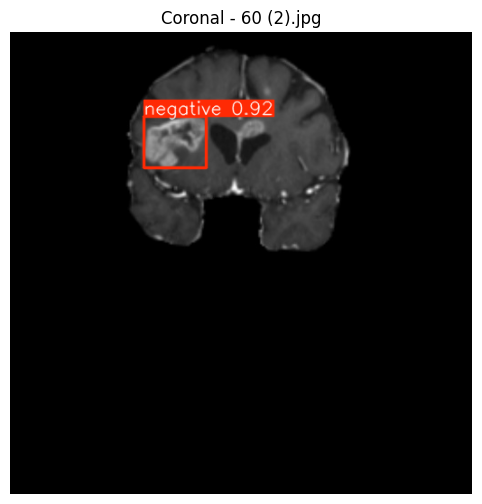

In [27]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Directories for sagittal and coronal test images
test_dirs = {
    "sagittal": "/kaggle/working/dataset_sagittal/images/test",
    "coronal": "/kaggle/working/dataset_coronal/images/test",
}

# Load the YOLO model
model_path = '/kaggle/working/runs/detect/train4/weights/best.pt'  # Replace with the correct path to your model
model = YOLO(model_path)

# Iterate through both directories
for plane, image_dir in test_dirs.items():
    print(f"\nProcessing {plane} test images...")

    # List all test images and select up to 40 images
    all_images = os.listdir(image_dir)
    selected_images = all_images[:40]

    # Predict and display results for each selected image
    for img_name in selected_images:
        img_path = os.path.join(image_dir, img_name)
        results = model.predict(img_path)  # Run prediction

        # Read and convert the image for visualization
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Plot predictions
        for result in results:
            plotted_img = result.plot()  # Plot with YOLO's plotting utility
            plt.figure(figsize=(8, 6))
            plt.imshow(plotted_img)
            plt.title(f"{plane.capitalize()} - {img_name}")  # Title includes plane and file name
            plt.axis('off')
            plt.show()
